**<center>Лабораторная работа №3. Классификация. Нейронные сети</center>**

### Installing dependencies

In [2]:
# Install necessary libraries for data analysis, machine learning, and visualization.

# pandas: for data manipulation and analysis.
# numpy: for numerical operations.
# scikit-learn: for machine learning algorithms and tools.
# matplotlib, seaborn: for data visualization.
# tensorflow: for neural network training.

%pip install -v pandas numpy scikit-learn matplotlib seaborn tensorflow

Using pip 25.3 from c:\Users\kasht\Documents\GitHub\2f7bcc6ff1e91c65fd126d1bbe4f43cb0e17abb4a05a12138fef5b83193d1a33\.venv\Lib\site-packages\pip (python 3.13)
Note: you may need to restart the kernel to use updated packages.


### Loading the dataset

In [3]:
import pandas as pd
import numpy as np

# Define the path to the dataset file.
file_path = 'Star39552_balanced.csv'

# Load the dataset.
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please check the file path.")
    
# Display the first 5 rows to get a feel for the data.
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Display a concise summary of the DataFrame.
print("\nDataset Info:")
df.info()

Dataset loaded successfully!

First 5 rows of the dataset:
    Vmag    Plx  e_Plx    B-V SpType       Amag  TargetClass
0  10.00  31.66   6.19  1.213    K7V  22.502556            1
1   8.26   3.21   1.00  1.130  K0III  15.792525            0
2   8.27  12.75   1.06  0.596    F9V  18.797552            1
3   6.54   5.23   0.76  1.189  K1III  15.132508            0
4   8.52   0.96   0.72  0.173    B8V  13.431356            1

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39552 entries, 0 to 39551
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vmag         39552 non-null  float64
 1   Plx          39552 non-null  float64
 2   e_Plx        39552 non-null  float64
 3   B-V          39552 non-null  float64
 4   SpType       39552 non-null  object 
 5   Amag         39552 non-null  float64
 6   TargetClass  39552 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 2.1+ MB


### Cleaning the dataset

In [4]:
# Drop columns that are derivative or cause data leakage.
df_clean = df.drop(columns=['Amag', 'SpType', 'e_Plx'])
print("Columns 'Amag', 'SpType' and 'e_Plx' have been removed.")
print("Remaining columns:", df_clean.columns.tolist())

Columns 'Amag', 'SpType' and 'e_Plx' have been removed.
Remaining columns: ['Vmag', 'Plx', 'B-V', 'TargetClass']


### Describing the dataset

In [5]:
# Display descriptive statistics for numerical columns.
print("\nDescriptive Statistics:")
print(df_clean.describe())


Descriptive Statistics:
               Vmag           Plx           B-V   TargetClass
count  39552.000000  39552.000000  39552.000000  39552.000000
mean       7.921309      7.117378      0.744336      0.500000
std        1.308857     12.446291      0.513987      0.500006
min       -0.620000    -27.840000     -0.400000      0.000000
25%        7.210000      2.430000      0.358000      0.000000
50%        8.160000      4.440000      0.703000      0.500000
75%        8.830000      8.232500      1.129000      1.000000
max       12.850000    772.330000      3.440000      1.000000


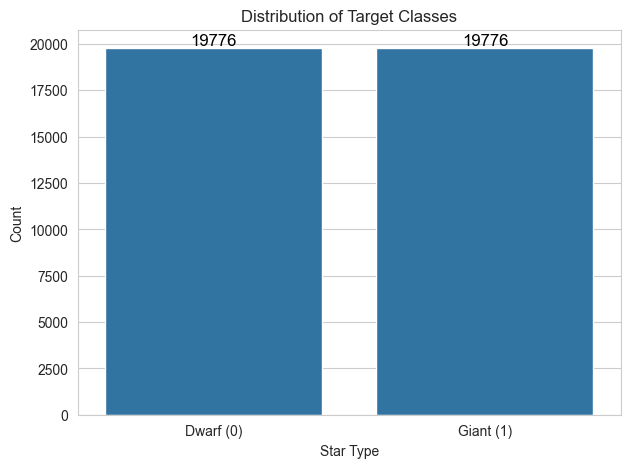

Number of observations: 39552
Recommended bins: 17


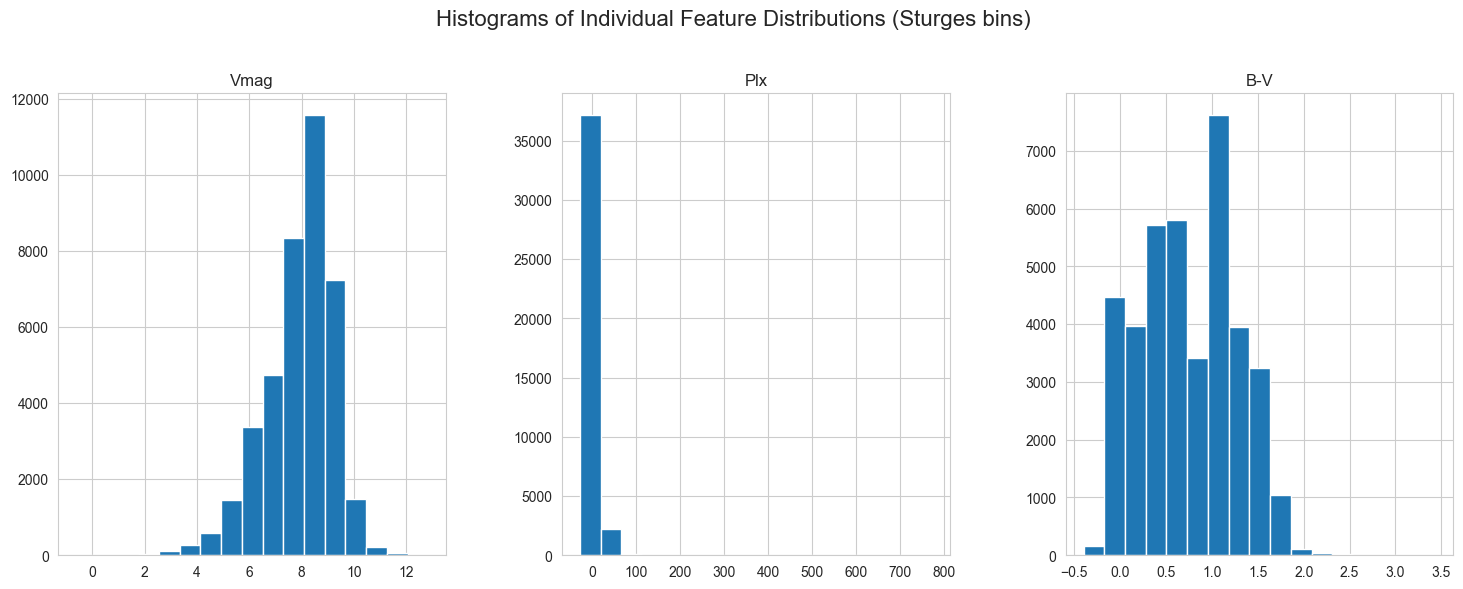


Feature Distributions by Target Class:


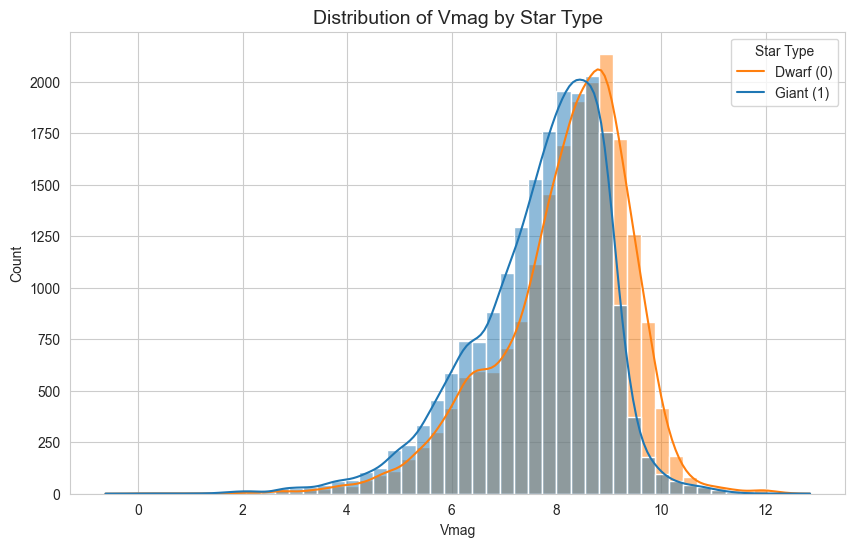

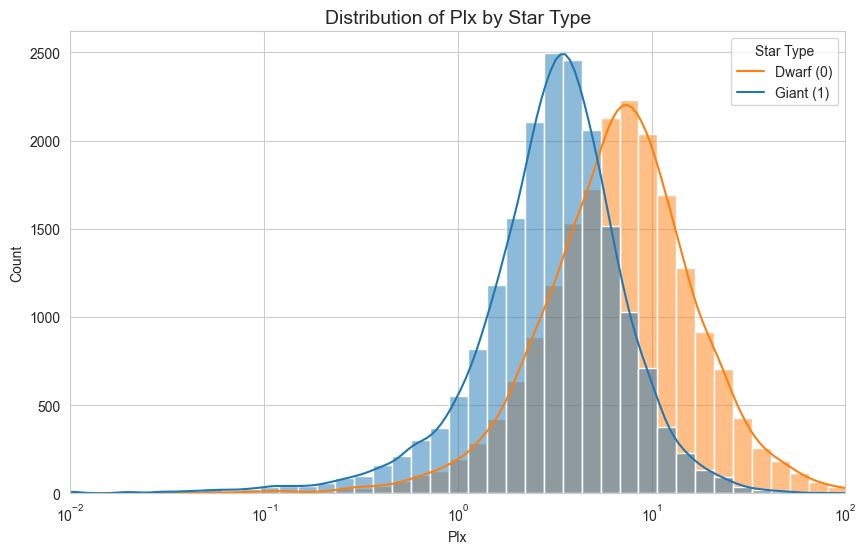

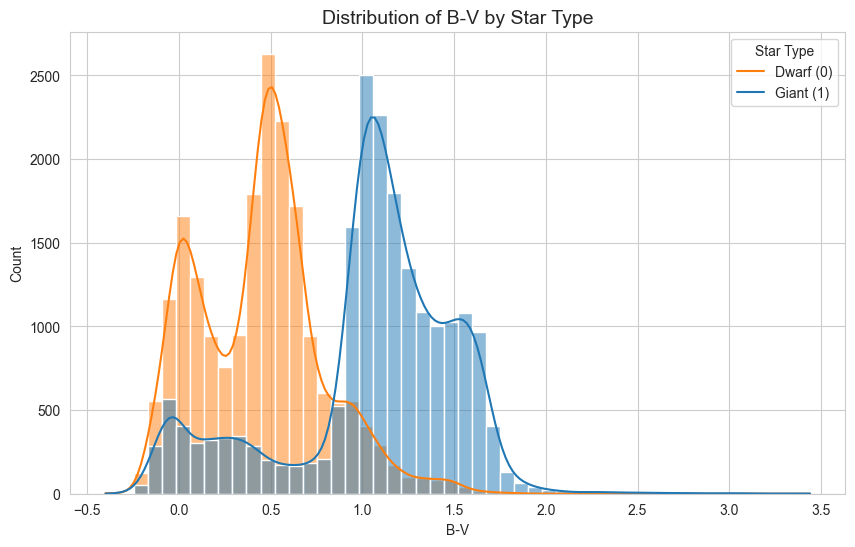

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style for the plots for better readability.
sns.set_style("whitegrid")

# 1. Analyze the distribution of the target variable
plt.figure(figsize=(7, 5))
sns.countplot(x='TargetClass', data=df_clean)
plt.title('Distribution of Target Classes')
plt.xlabel('Star Type')
plt.ylabel('Count')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), f'{int(p.get_height())}', 
            fontsize=12, color='black', ha='center', va='bottom')
plt.xticks([0, 1], ['Dwarf (0)', 'Giant (1)'])
plt.show()


n = len(df_clean)
bins_sturges = int(np.ceil(np.log2(n) + 1))
print(f"Number of observations: {n}")
print(f"Recommended bins: {bins_sturges}")

# 2. Analyze the distribution of individual features
features = ['Vmag', 'Plx', 'B-V']
df_clean[features].hist(bins=bins_sturges, figsize=(18, 6), layout=(1, 3))
plt.suptitle('Histograms of Individual Feature Distributions (Sturges bins)', size=16, y=1.02)
plt.show()


# 3. Analyze feature distributions per class
print("\nFeature Distributions by Target Class:")
for feature in features:
    plt.figure(figsize=(10, 6))
    
    if feature == 'Plx':
        data_to_plot = df_clean[df_clean['Plx'] > 0].copy()
        
        sns.histplot(
            data=data_to_plot,
            x=feature,
            hue='TargetClass',
            kde=True,
            bins=50,
            log_scale=(True, False)
        )
        
        plt.xlim(0.01, 100)
        plt.title(f'Distribution of {feature} by Star Type', size=14)
    
    else:
        data_to_plot = df_clean
        sns.histplot(
            data=data_to_plot,
            x=feature,
            hue='TargetClass',
            kde=True,
            bins=50
        )
        plt.title(f'Distribution of {feature} by Star Type', size=14)
    
    plt.legend(title='Star Type', labels=['Dwarf (0)', 'Giant (1)'])
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

### Selecting most important features

In [7]:
# Separate features (X) and target (y)
X = df_clean.drop('TargetClass', axis=1)
y = df_clean['TargetClass']
feature_names = X.columns
print("Features and Target are separated.")

Features and Target are separated.


Feature Importance using ANOVA F-test:
  Feature       F-Score
2     B-V  21329.755816
1     Plx   2672.093294
0    Vmag   1266.283460


C:\Users\kasht\AppData\Local\Temp\ipykernel_15616\4098700681.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='F-Score', y='Feature', data=f_scores, palette='viridis')


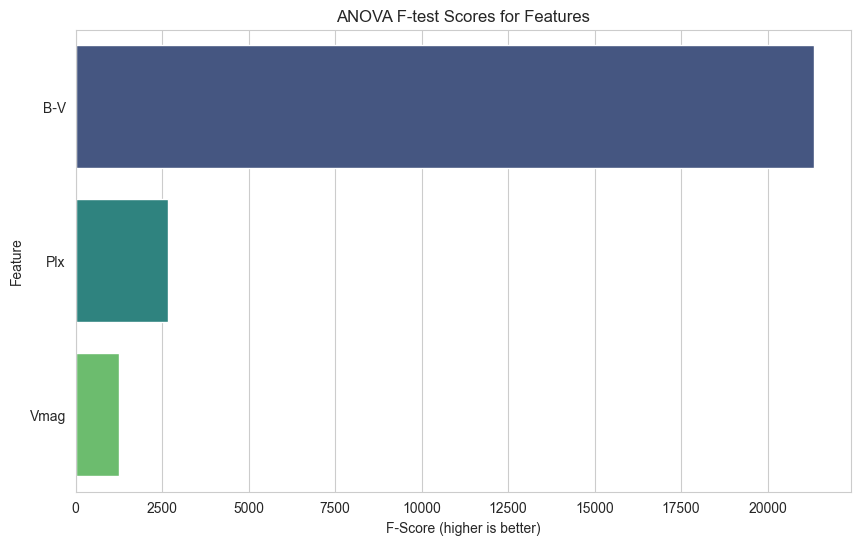

In [8]:
from sklearn.feature_selection import SelectKBest, f_classif

# SelectKBest selects features based on the k highest scores.
f_selector = SelectKBest(score_func=f_classif, k='all')

# Fit the selector to the data.
f_selector.fit(X, y)

# Get the scores for each feature.
f_scores = pd.DataFrame({'Feature': feature_names, 'F-Score': f_selector.scores_})
f_scores = f_scores.sort_values(by='F-Score', ascending=False)

print("Feature Importance using ANOVA F-test:")
print(f_scores)

# Visualize the F-scores
plt.figure(figsize=(10, 6))
sns.barplot(x='F-Score', y='Feature', data=f_scores, palette='viridis')
plt.title('ANOVA F-test Scores for Features')
plt.xlabel('F-Score (higher is better)')
plt.ylabel('Feature')
plt.show()

Feature Importance from Decision Tree:
  Feature  Importance
2     B-V    0.630359
1     Plx    0.225122
0    Vmag    0.144519


C:\Users\kasht\AppData\Local\Temp\ipykernel_15616\2424012149.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=tree_importances, palette='mako')


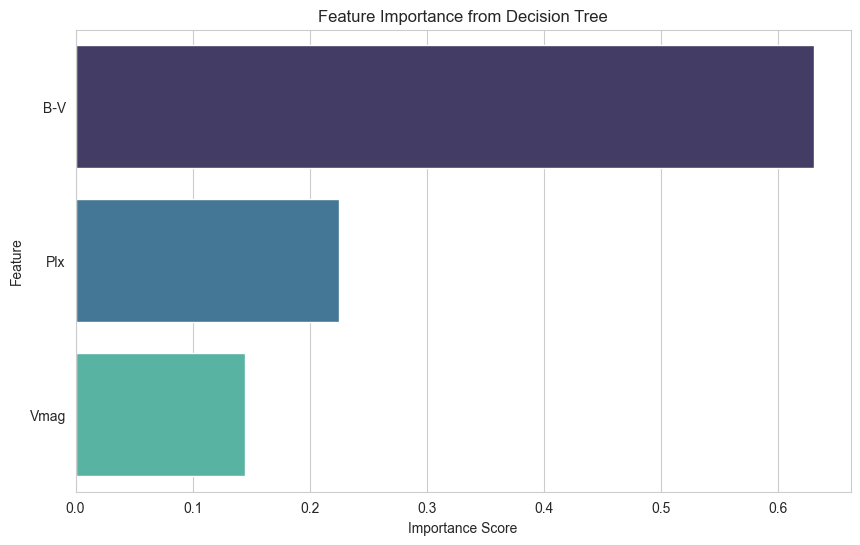

In [9]:
from sklearn.tree import DecisionTreeClassifier

# Initialize a simple Decision Tree Classifier.
tree_model_for_importance = DecisionTreeClassifier(random_state=42)

# Fit the model to the data.
tree_model_for_importance.fit(X, y)

# Get feature importances from the trained model.
importances = tree_model_for_importance.feature_importances_
tree_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
tree_importances = tree_importances.sort_values(by='Importance', ascending=False)

print("Feature Importance from Decision Tree:")
print(tree_importances)

# Visualize the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=tree_importances, palette='mako')
plt.title('Feature Importance from Decision Tree')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

Feature Importance using Mutual Information:
  Feature  Mutual_Information
2     B-V            0.299973
1     Plx            0.107951
0    Vmag            0.031177


C:\Users\kasht\AppData\Local\Temp\ipykernel_15616\539499514.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mutual_Information', y='Feature', data=mi_scores_df, palette='plasma')


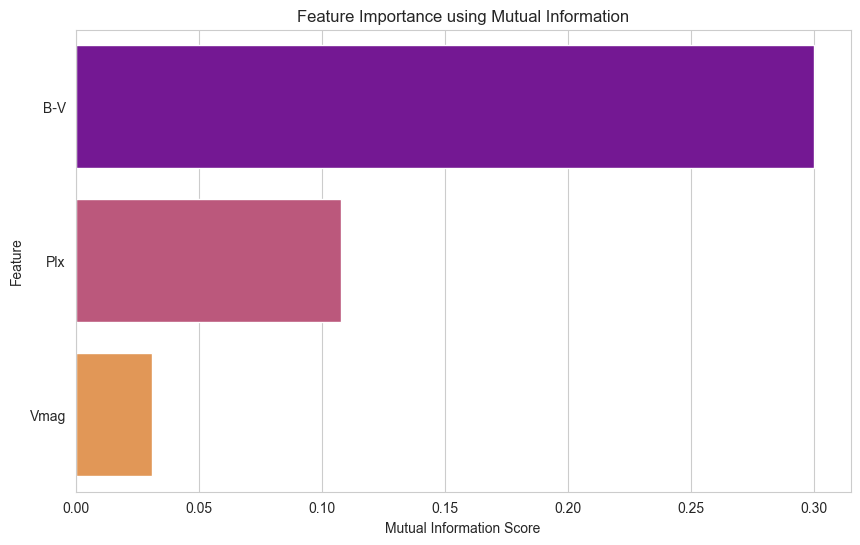

In [10]:
from sklearn.feature_selection import mutual_info_classif

# Calculate mutual information scores.
mi_scores = mutual_info_classif(X, y, random_state=42)

# Create a DataFrame for visualization.
mi_scores_df = pd.DataFrame({'Feature': feature_names, 'Mutual_Information': mi_scores})
mi_scores_df = mi_scores_df.sort_values(by='Mutual_Information', ascending=False)

print("Feature Importance using Mutual Information:")
print(mi_scores_df)

# Visualize the mutual information scores.
plt.figure(figsize=(10, 6))
sns.barplot(x='Mutual_Information', y='Feature', data=mi_scores_df, palette='plasma')
plt.title('Feature Importance using Mutual Information')
plt.xlabel('Mutual Information Score')
plt.ylabel('Feature')
plt.show()

### Building categorized scatter plots

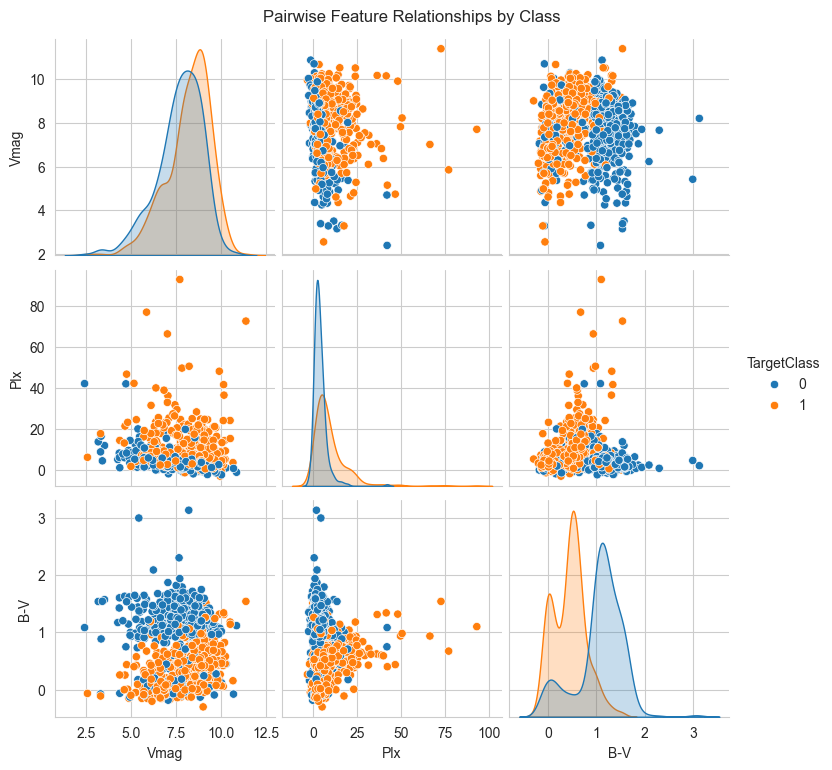

In [11]:
# Visualize the relationship between pairs of features, coloring points by class.
df_sample = df_clean.sample(n=1024, random_state=42)
sns.pairplot(df_sample, hue='TargetClass', diag_kind='kde')
plt.suptitle('Pairwise Feature Relationships by Class', y=1.02)
plt.show()

### Preprocessing the dataset

In [12]:
from sklearn.model_selection import train_test_split

# Get features and target.
X = df_clean.drop('TargetClass', axis=1)
y = df_clean['TargetClass']

# Generate train and test splits using 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Training target distribution:\n{y_train.value_counts(normalize=True)}")
print(f"Test target distribution:\n{y_test.value_counts(normalize=True)}")

Training set shape: (31641, 3)
Test set shape: (7911, 3)
Training target distribution:
TargetClass
1    0.500016
0    0.499984
Name: proportion, dtype: float64
Test target distribution:
TargetClass
0    0.500063
1    0.499937
Name: proportion, dtype: float64


In [13]:
from sklearn.preprocessing import StandardScaler

# Create standard scaler.
scaler = StandardScaler()

# Fit the scaler on the training data and transform it.
X_train_scaled = scaler.fit_transform(X_train)

# Use the fitted scaler to transform the test data.
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames.
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("\nFirst 5 rows of the scaled training data:")
print(X_train_scaled.head())


First 5 rows of the scaled training data:
       Vmag       Plx       B-V
0  1.652378 -0.214107 -1.557623
1 -0.753237 -0.009323  0.597161
2  0.771341  2.136988  0.597161
3  0.801985 -0.358763  0.418082
4 -0.446790 -0.485119 -1.324042


### Naive Bayes Method

In [25]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                             roc_auc_score, confusion_matrix, RocCurveDisplay, PrecisionRecallDisplay)
from sklearn.inspection import permutation_importance

# Print all metrics
def print_and_get_metrics(y_true, y_pred, y_proba, dataset_name):
    accuracy = accuracy_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_proba)
    
    precision_macro = precision_score(y_true, y_pred, average='macro')
    precision_micro = precision_score(y_true, y_pred, average='micro')
    
    recall_macro = recall_score(y_true, y_pred, average='macro')
    recall_micro = recall_score(y_true, y_pred, average='micro')
    
    f1_macro = f1_score(y_true, y_pred, average='macro')
    f1_micro = f1_score(y_true, y_pred, average='micro')
    
    print(f"Metrics from '{dataset_name}' dataset:")
    
    print("  Core Metrics:")
    print(f"    - Accuracy: {accuracy:.6f}")
    print(f"    - AUC-ROC:  {auc:.6f}\n")

    print("  Precision:")
    print(f"    - Macro-Averaged: {precision_macro:.6f}")
    print(f"    - Micro-Averaged: {precision_micro:.6f}\n")

    print("  Recall:")
    print(f"    - Macro-Averaged: {recall_macro:.6f}")
    print(f"    - Micro-Averaged: {recall_micro:.6f}\n")

    print("  F1-score:")
    print(f"    - Macro-Averaged: {f1_macro:.6f}")
    print(f"    - Micro-Averaged: {f1_micro:.6f}\n")
    
    metrics_dict = {
        'Accuracy': accuracy,
        'AUC-ROC': auc,
        'F1-Macro': f1_macro,
        'Precision-Macro': precision_macro,
        'Recall-Macro': recall_macro
    }
    
    return metrics_dict

# Evaluate all metrics
def evaluate_model(model, model_name, X_train, y_train, X_test, y_test, cmap='viridis'):
    print(f"Evaluating model: {model_name}")
    
    # Metrics on Test Set
    y_pred_test = model.predict(X_test)
    y_proba_test = model.predict_proba(X_test)[:, 1]
    test_metrics = print_and_get_metrics(y_test, y_pred_test, y_proba_test, "Test")

    # Metrics on Train Set
    y_pred_train = model.predict(X_train)
    y_proba_train = model.predict_proba(X_train)[:, 1]
    _ = print_and_get_metrics(y_train, y_pred_train, y_proba_train, "Train")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm.T, annot=True, fmt='d', cmap=cmap, 
                xticklabels=['Actual Dwarf (0)', 'Actual Giant (1)'], 
                yticklabels=['Predicted Dwarf (0)', 'Predicted Giant (1)'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Predicted Class')
    plt.xlabel('Actual Class')
    plt.show()

    # ROC and PR Curves
    print(f"\nPlotting ROC and PR Curves for {model_name}:")
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # ROC Curve
    RocCurveDisplay.from_estimator(model, X_test, y_test, ax=ax1)
    ax1.set_title(f'ROC-Curve for {model_name}')

    # Precision-Recall Curve
    PrecisionRecallDisplay.from_estimator(model, X_test, y_test, ax=ax2)
    ax2.set_title(f'PR-Curve for {model_name}')
    plt.tight_layout()
    plt.show()

    # Feature Importance
    print(f"\nCalculating Permutation Importance for {model_name}:")
    perm_importance = permutation_importance(
        model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1
    )
    perm_importance_df = pd.DataFrame({
        'Feature': X_test.columns,
        'Importance': perm_importance.importances_mean
    }).sort_values(by='Importance', ascending=False)
    print(perm_importance_df)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=perm_importance_df, palette='cubehelix')
    plt.title(f'Permutation Importance for {model_name} Model')
    plt.xlabel('Mean Accuracy Decrease')
    plt.ylabel('Feature')
    plt.show()
    
    return test_metrics

In [26]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Define the model.
nb = GaussianNB()

# Define the parameter grid.
param_grid_nb = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

# Set up GridSearchCV.
print("Searching for the best parameters for Naive Bayes...")
grid_search_nb = GridSearchCV(nb, param_grid_nb, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search.
grid_search_nb.fit(X_train_scaled, y_train)

# Get the best parameters.
best_params_nb = grid_search_nb.best_params_
print(f"Optimal parameters found: {best_params_nb}")
print(f"Best cross-validation accuracy: {grid_search_nb.best_score_:.4f}")

Searching for the best parameters for Naive Bayes...
Optimal parameters found: {'var_smoothing': np.float64(0.8111308307896871)}
Best cross-validation accuracy: 0.8481



Analyzing the impact of the 'var_smoothing' hyperparameter...


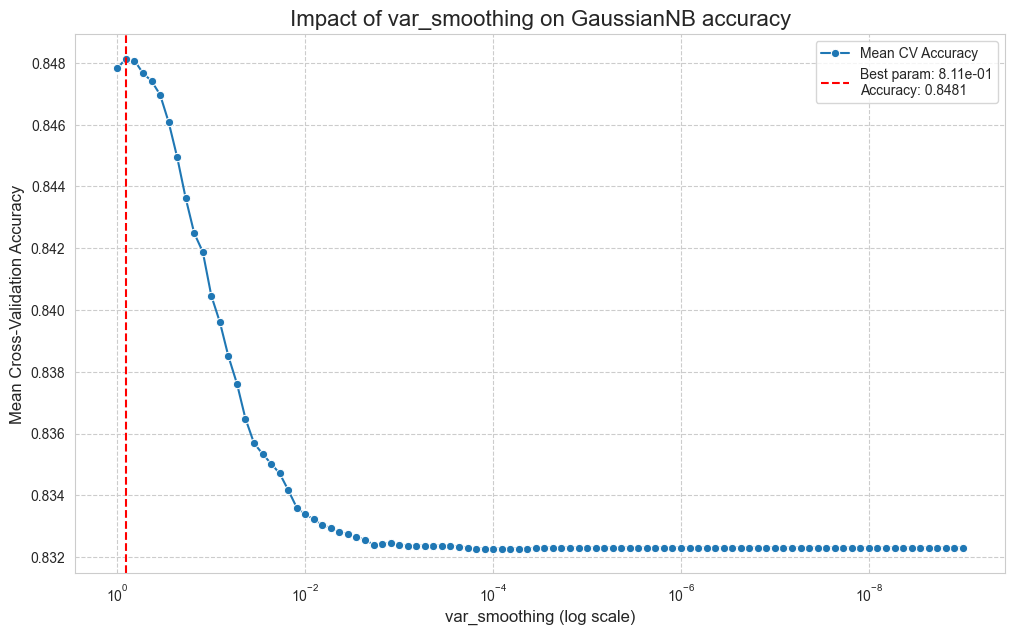

In [41]:
print("\nAnalyzing the impact of the 'var_smoothing' hyperparameter...")

# Extract results from GridSearchCV.
results = pd.DataFrame(grid_search_nb.cv_results_)
var_smoothing_values = results['param_var_smoothing'].astype(np.float64)
mean_scores = results['mean_test_score']

# Create the plot.
plt.figure(figsize=(12, 7))
sns.lineplot(x=var_smoothing_values, y=mean_scores, marker='o', label='Mean CV Accuracy')

# Highlight the best score.
best_score = grid_search_nb.best_score_
best_param = best_params_nb['var_smoothing']
plt.axvline(best_param, color='r', linestyle='--', label=f'Best param: {best_param:.2e}\nAccuracy: {best_score:.4f}')

# Add titles and labels for clarity.
plt.title('Impact of var_smoothing on GaussianNB accuracy', fontsize=16)
plt.xlabel('var_smoothing (log scale)', fontsize=12)
plt.ylabel('Mean Cross-Validation Accuracy', fontsize=12)
plt.xscale('log')
plt.gca().invert_xaxis()
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

In [15]:
# Create the final Naive Bayes model with the optimal parameters.
nb_best = GaussianNB(**best_params_nb)

# Train the model.
nb_best.fit(X_train_scaled, y_train)
print("\nNaive Bayes model trained with optimal parameters.")


Naive Bayes model trained with optimal parameters.


Evaluating model: Naive Bayes
Metrics from 'Test' dataset:
  Core Metrics:
    - Accuracy: 0.849324
    - AUC-ROC:  0.892469

  Precision:
    - Macro-Averaged: 0.849327
    - Micro-Averaged: 0.849324

  Recall:
    - Macro-Averaged: 0.849324
    - Micro-Averaged: 0.849324

  F1-score:
    - Macro-Averaged: 0.849323
    - Micro-Averaged: 0.849324

Metrics from 'Train' dataset:
  Core Metrics:
    - Accuracy: 0.848488
    - AUC-ROC:  0.890400

  Precision:
    - Macro-Averaged: 0.848533
    - Micro-Averaged: 0.848488

  Recall:
    - Macro-Averaged: 0.848488
    - Micro-Averaged: 0.848488

  F1-score:
    - Macro-Averaged: 0.848483
    - Micro-Averaged: 0.848488



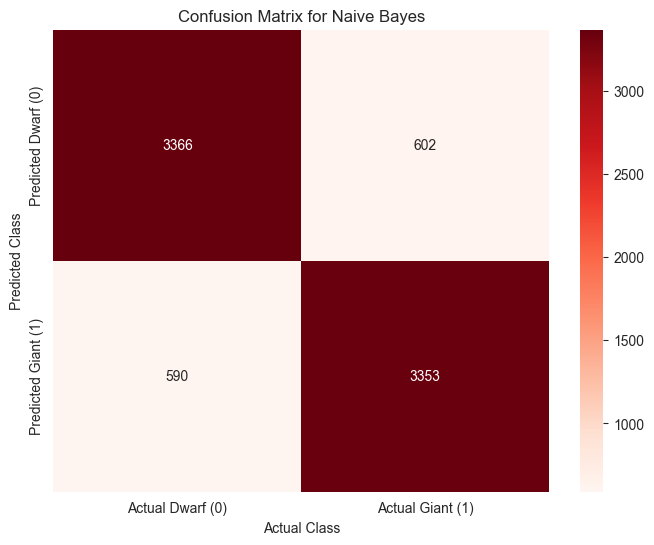


Plotting ROC and PR Curves for Naive Bayes:


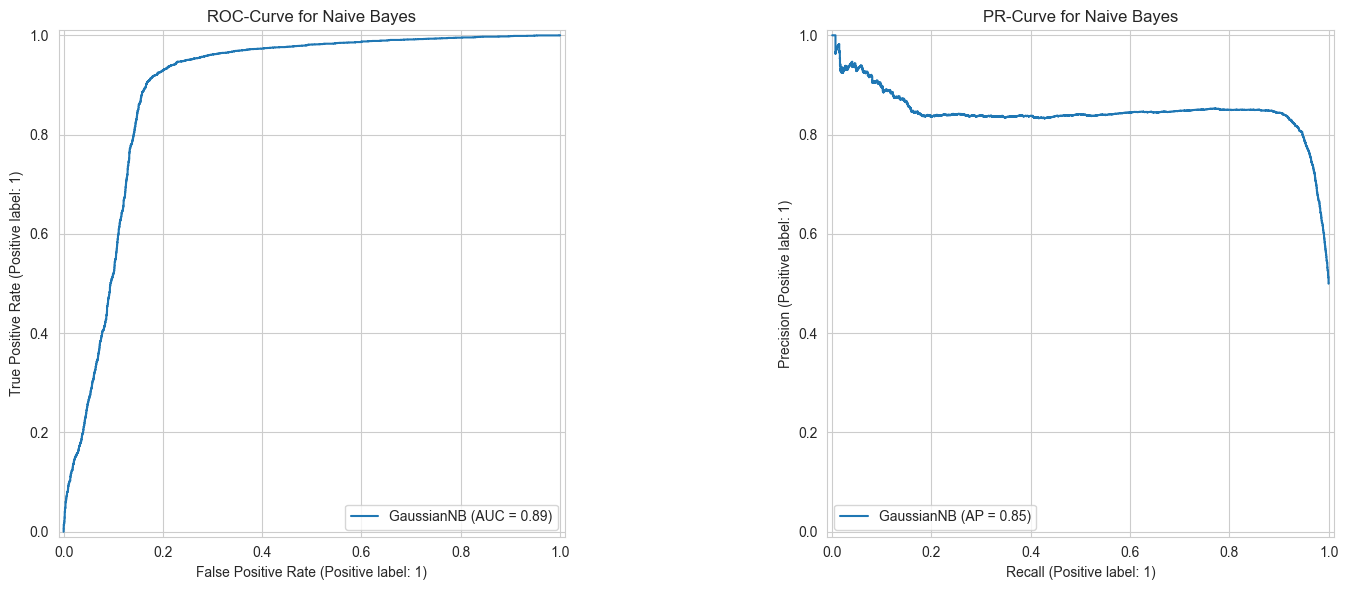


Calculating Permutation Importance for Naive Bayes:
  Feature  Importance
2     B-V    0.284907
1     Plx    0.117457
0    Vmag    0.066148


C:\Users\kasht\AppData\Local\Temp\ipykernel_12048\3177434484.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=perm_importance_df, palette='cubehelix')


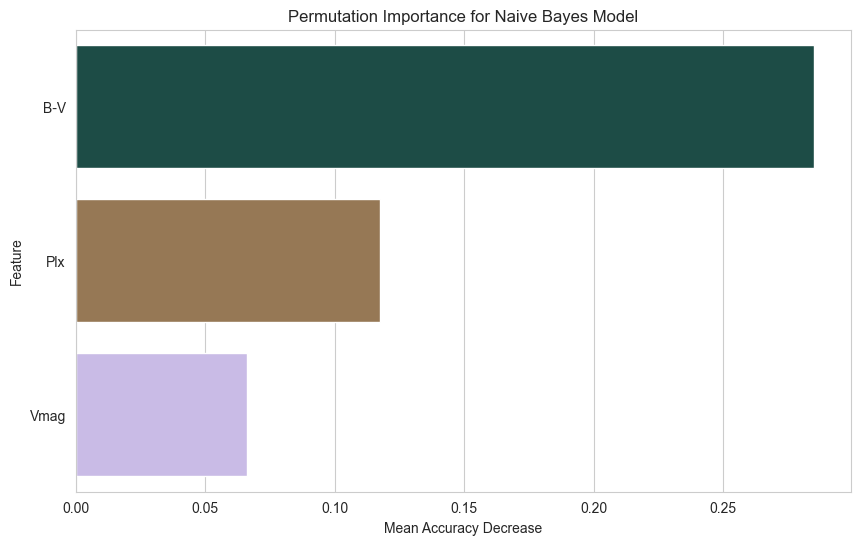

In [16]:
# Evaluate the model and store the results.
model_results = {}
model_results['Naive Bayes'] = evaluate_model(
    model=nb_best, 
    model_name='Naive Bayes',
    X_train=X_train_scaled, y_train=y_train,
    X_test=X_test_scaled, y_test=y_test,
    cmap='Reds'
)

### k-Nearest Neighbors Method

In [39]:
from sklearn.neighbors import KNeighborsClassifier

# Define the model.
knn = KNeighborsClassifier()

# Define the parameter grid.
param_grid = {'n_neighbors': np.arange(1, 31, 2)}

# Set up GridSearchCV.
grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search on the training data.
print("Searching for the best 'k' for kNN...")
grid_search_knn.fit(X_train_scaled, y_train)

# Get the best parameter.
best_k = grid_search_knn.best_params_['n_neighbors']
print(f"Optimal 'k' found: {best_k}")
print(f"Best cross-validation accuracy: {grid_search_knn.best_score_:.4f}")

Searching for the best 'k' for kNN...
Optimal 'k' found: 29
Best cross-validation accuracy: 0.8817



Analyzing the impact of the 'n_neighbors' hyperparameter...


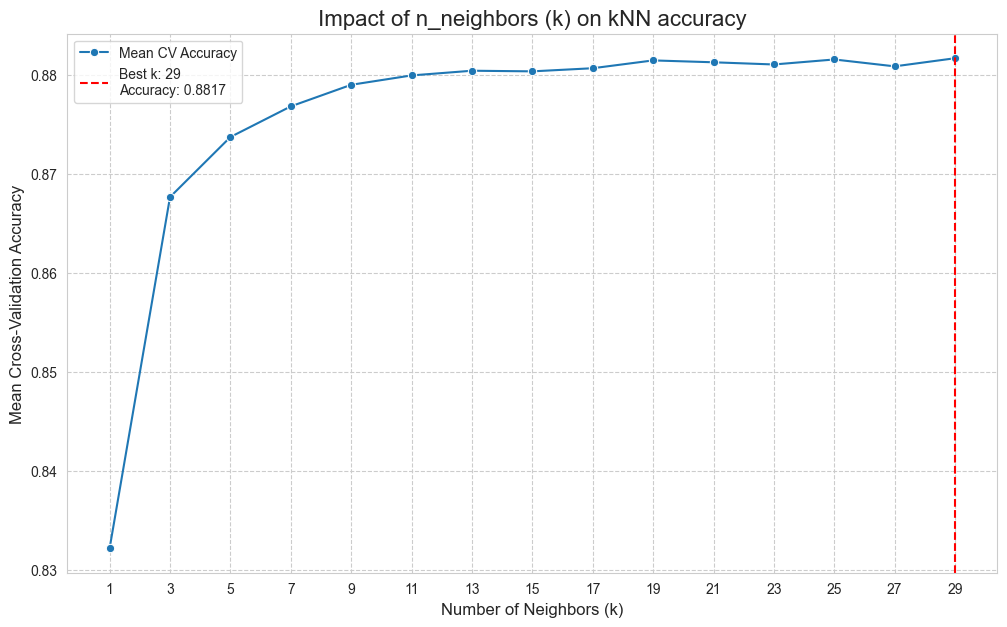

In [40]:
print("\nAnalyzing the impact of the 'n_neighbors' hyperparameter...")

# Extract results from GridSearchCV.
results = pd.DataFrame(grid_search_knn.cv_results_)
n_neighbors_values = results['param_n_neighbors'].astype(int)
mean_scores = results['mean_test_score']

# Create the plot.
plt.figure(figsize=(12, 7))
sns.lineplot(x=n_neighbors_values, y=mean_scores, marker='o', label='Mean CV Accuracy')

# Highlight the best score.
best_score = grid_search_knn.best_score_
best_param = best_k
plt.axvline(best_param, color='r', linestyle='--', label=f'Best k: {best_param}\nAccuracy: {best_score:.4f}')

# Add titles and labels for clarity.
plt.title('Impact of n_neighbors (k) on kNN accuracy', fontsize=16)
plt.xlabel('Number of Neighbors (k)', fontsize=12)
plt.ylabel('Mean Cross-Validation Accuracy', fontsize=12)
plt.xticks(n_neighbors_values)
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

In [18]:
# Create the final kNN model with the optimal number of neighbors.
knn_best = KNeighborsClassifier(n_neighbors=best_k)

# Train the model on the entire scaled training set.
knn_best.fit(X_train_scaled, y_train)
print("\nkNN model trained with optimal k.")


kNN model trained with optimal k.


Evaluating model: kNN
Metrics from 'Test' dataset:
  Core Metrics:
    - Accuracy: 0.879535
    - AUC-ROC:  0.933800

  Precision:
    - Macro-Averaged: 0.880102
    - Micro-Averaged: 0.879535

  Recall:
    - Macro-Averaged: 0.879537
    - Micro-Averaged: 0.879535

  F1-score:
    - Macro-Averaged: 0.879490
    - Micro-Averaged: 0.879535

Metrics from 'Train' dataset:
  Core Metrics:
    - Accuracy: 0.887077
    - AUC-ROC:  0.951935

  Precision:
    - Macro-Averaged: 0.888008
    - Micro-Averaged: 0.887077

  Recall:
    - Macro-Averaged: 0.887076
    - Micro-Averaged: 0.887077

  F1-score:
    - Macro-Averaged: 0.887009
    - Micro-Averaged: 0.887077



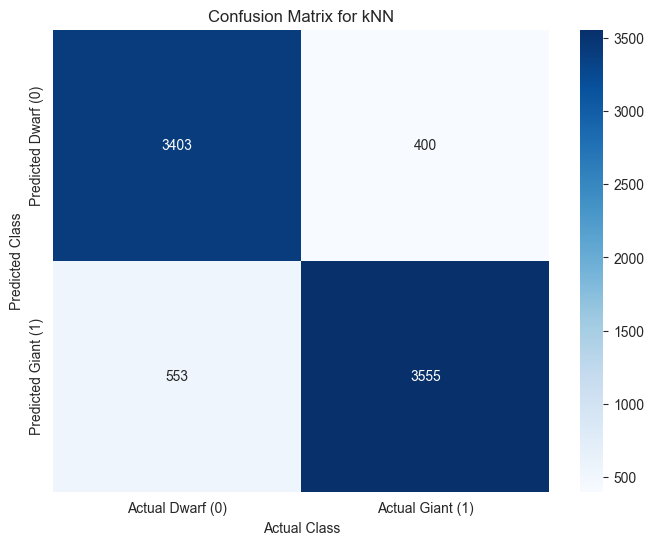


Plotting ROC and PR Curves for kNN:


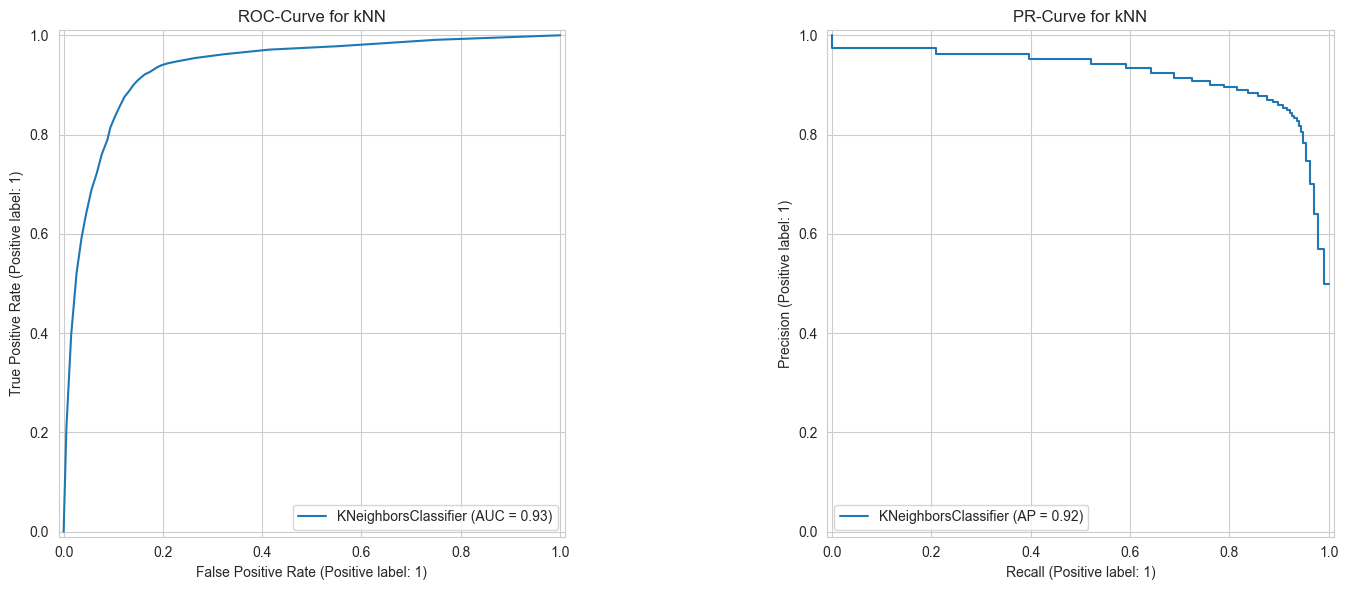


Calculating Permutation Importance for kNN:
  Feature  Importance
2     B-V    0.281494
1     Plx    0.109240
0    Vmag    0.058223


C:\Users\kasht\AppData\Local\Temp\ipykernel_12048\3177434484.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=perm_importance_df, palette='cubehelix')


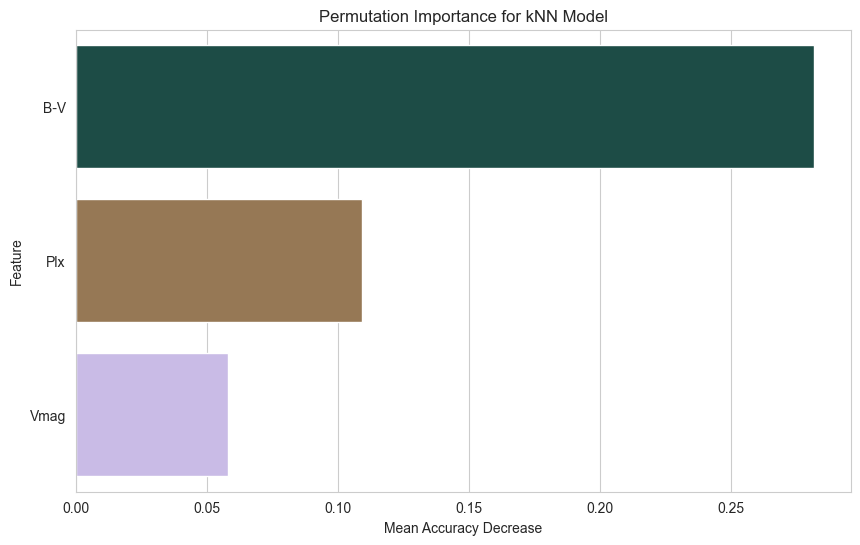

In [19]:
# Store results for final comparison
model_results['kNN'] = evaluate_model(
    model=knn_best, 
    model_name='kNN',
    X_train=X_train_scaled, 
    y_train=y_train,
    X_test=X_test_scaled, 
    y_test=y_test,
    cmap='Blues'
)

### Linear Discriminant Analysis Method

In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Define the model.
lda = LinearDiscriminantAnalysis()

# Define the parameter grid.
param_grid_lda = [
    {'solver': ['svd']},
    {'solver': ['lsqr'], 'shrinkage': np.arange(0.0, 1.1, 0.2)},
    {'solver': ['eigen'], 'shrinkage': np.arange(0.0, 1.1, 0.2)}
]

# Set up GridSearchCV.
print("Searching for the best parameters for Linear Discriminant Analysis...")
grid_search_lda = GridSearchCV(lda, param_grid_lda, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search on the training data.
grid_search_lda.fit(X_train_scaled, y_train)

# Get the best parameters.
best_params_lda = grid_search_lda.best_params_
print(f"Optimal parameters found: {best_params_lda}")
print(f"Best cross-validation accuracy: {grid_search_lda.best_score_:.4f}")

Searching for the best parameters for Linear Discriminant Analysis...
Optimal parameters found: {'solver': 'svd'}
Best cross-validation accuracy: 0.8723



Analyzing the impact of 'solver' and 'shrinkage' hyperparameters...


C:\Users\kasht\AppData\Local\Temp\ipykernel_15616\907462999.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='mean_test_score', y='label', data=results_sorted, palette='plasma')


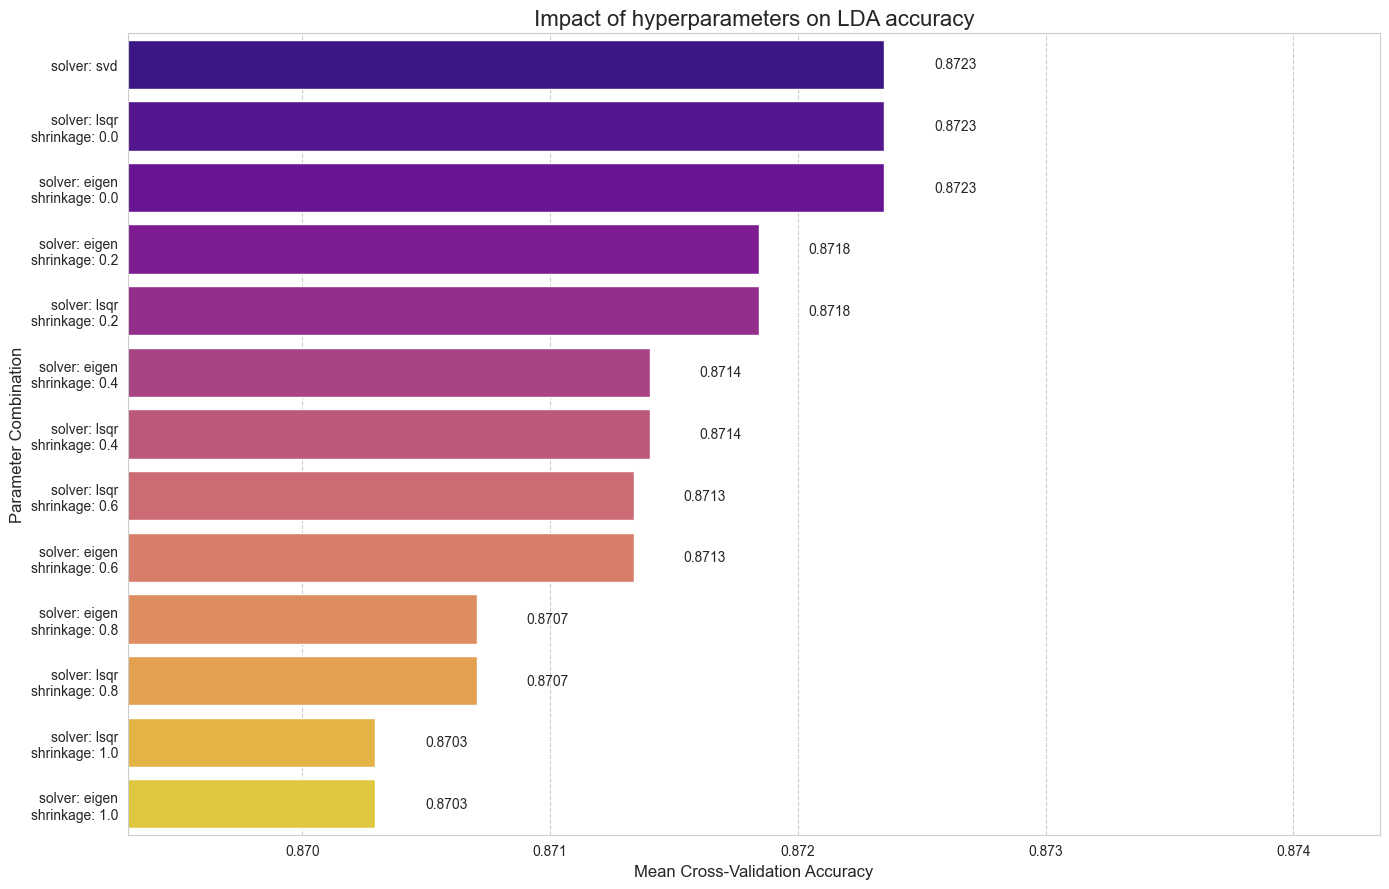

In [37]:
print("\nAnalyzing the impact of 'solver' and 'shrinkage' hyperparameters...")

# Extract results from GridSearchCV.
results = pd.DataFrame(grid_search_lda.cv_results_)

# Create descriptive labels for each parameter combination for the plot.
results['param_shrinkage'] = results['param_shrinkage'].fillna('N/A')
labels = []
for _, row in results.iterrows():
    solver = row['param_solver']
    shrinkage = row['param_shrinkage']
    if solver == 'svd':
        labels.append('solver: svd')
    else:
        labels.append(f"solver: {solver}\nshrinkage: {shrinkage:.1f}")
results['label'] = labels

# Sort the results by score for a more readable chart.
results_sorted = results.sort_values(by='mean_test_score', ascending=False)

# Create the plot. A horizontal bar chart is best for long labels.
plt.figure(figsize=(14, 9))
ax = sns.barplot(x='mean_test_score', y='label', data=results_sorted, palette='plasma')

# Add titles and labels.
ax.set_title('Impact of hyperparameters on LDA accuracy', fontsize=16)
ax.set_xlabel('Mean Cross-Validation Accuracy', fontsize=12)
ax.set_ylabel('Parameter Combination', fontsize=12)

# Add accuracy values directly to the bars for precise comparison.
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.0002,
            p.get_y() + p.get_height() / 2.,
            f'{width:.4f}',
            va='center')

# Adjust x-axis limits to ensure text labels are fully visible.
min_score = results_sorted['mean_test_score'].min()
max_score = results_sorted['mean_test_score'].max()
ax.set_xlim(min_score - 0.001, max_score + 0.002)

plt.grid(True, axis='x', linestyle='--')
plt.tight_layout()
plt.show()

In [24]:
# Create the final LDA model with the optimal parameters.
lda_best = LinearDiscriminantAnalysis(**best_params_lda)

# Train the model.
lda_best.fit(X_train_scaled, y_train)
print("\nLDA model trained with optimal parameters.")


LDA model trained with optimal parameters.


Evaluating model: LDA
Metrics from 'Test' dataset:
  Core Metrics:
    - Accuracy: 0.873467
    - AUC-ROC:  0.894172

  Precision:
    - Macro-Averaged: 0.876395
    - Micro-Averaged: 0.873467

  Recall:
    - Macro-Averaged: 0.873473
    - Micro-Averaged: 0.873467

  F1-score:
    - Macro-Averaged: 0.873222
    - Micro-Averaged: 0.873467

Metrics from 'Train' dataset:
  Core Metrics:
    - Accuracy: 0.872318
    - AUC-ROC:  0.889375

  Precision:
    - Macro-Averaged: 0.876079
    - Micro-Averaged: 0.872318

  Recall:
    - Macro-Averaged: 0.872316
    - Micro-Averaged: 0.872318

  F1-score:
    - Macro-Averaged: 0.871997
    - Micro-Averaged: 0.872318



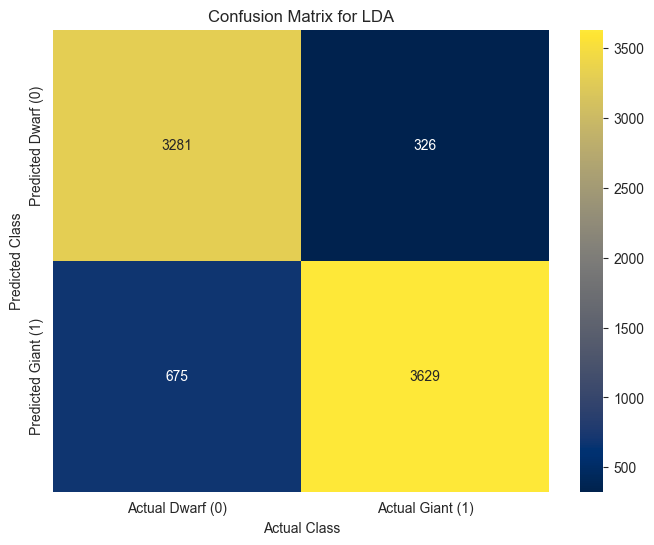


Plotting ROC and PR Curves for LDA:


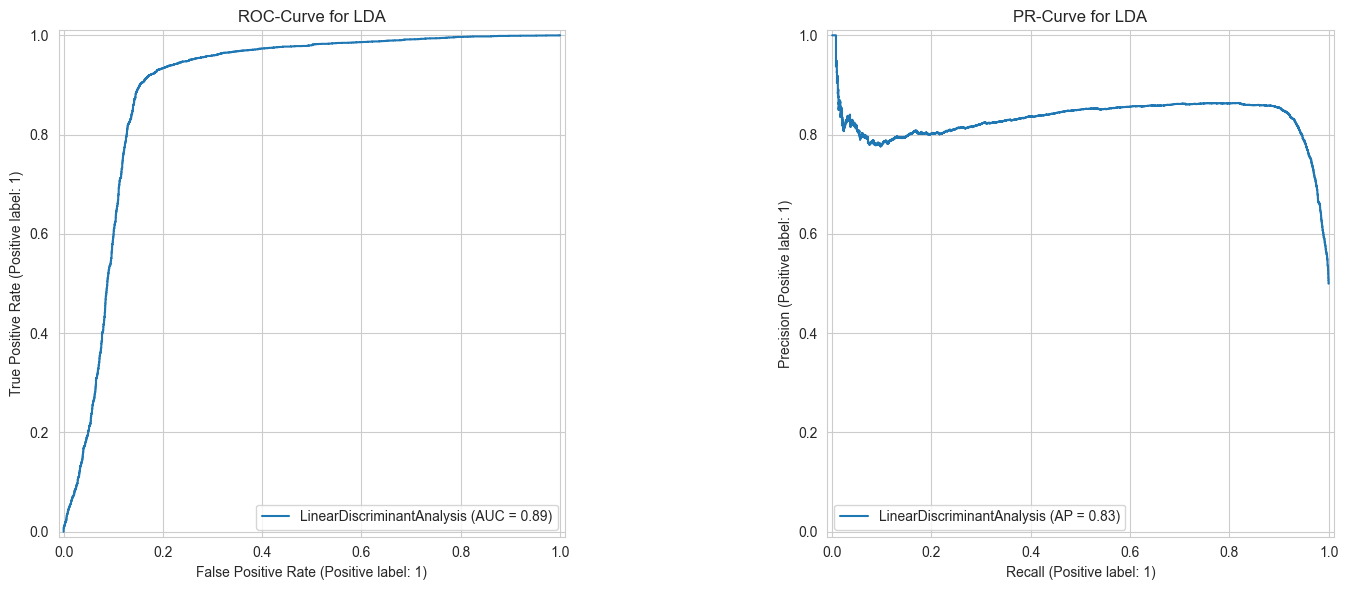


Calculating Permutation Importance for LDA:
  Feature  Importance
2     B-V    0.320250
1     Plx    0.056820
0    Vmag    0.049779


C:\Users\kasht\AppData\Local\Temp\ipykernel_12048\3177434484.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=perm_importance_df, palette='cubehelix')


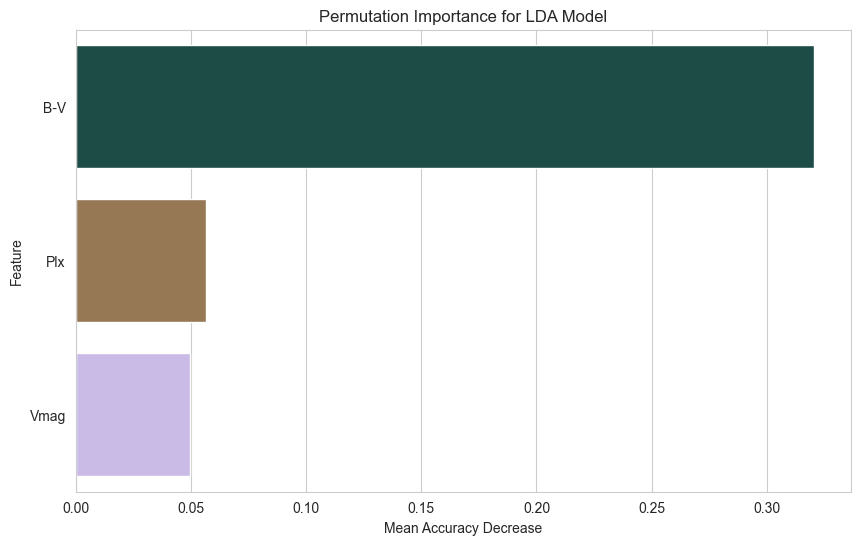

In [25]:
# Evaluate the model and store the results.
model_results['LDA'] = evaluate_model(
    model=lda_best, 
    model_name='LDA',
    X_train=X_train_scaled, y_train=y_train,
    X_test=X_test_scaled, y_test=y_test,
    cmap='cividis'
)

### Decision Tree Method

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Define the model.
dt = DecisionTreeClassifier(random_state=42)

# Define the parameter grid.
param_grid = {
    'criterion': ['gini'],
    'max_depth': [3, 5, 10, 16, 32],
    'min_samples_split': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 32, 64]
}

# Set up GridSearchCV.
print("Searching for the best parameters for Decision Tree...")
grid_search_dt = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search on the training data.
grid_search_dt.fit(X_train_scaled, y_train)

# Get the best parameters.
best_params_dt = grid_search_dt.best_params_
print(f"Optimal parameters found: {best_params_dt}")
print(f"Best cross-validation accuracy: {grid_search_dt.best_score_:.4f}")

Searching for the best parameters for Decision Tree...
Optimal parameters found: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best cross-validation accuracy: 0.8773



Analyzing the impact of 'max_depth' and 'min_samples_leaf' hyperparameters...


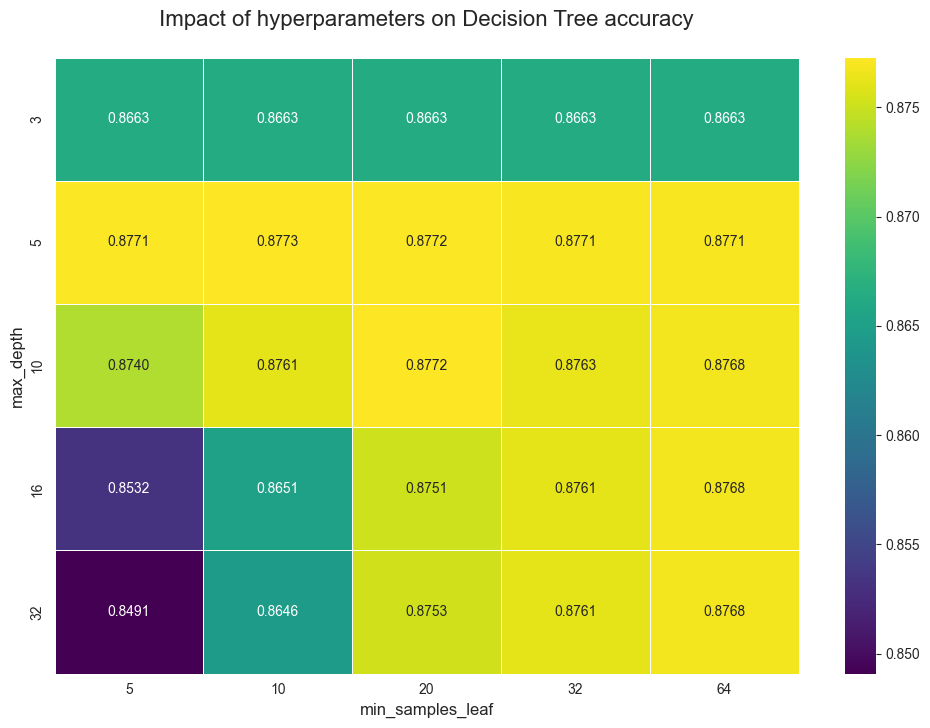

In [36]:
print("\nAnalyzing the impact of 'max_depth' and 'min_samples_leaf' hyperparameters...")

# Extract results from GridSearchCV.
results = pd.DataFrame(grid_search_dt.cv_results_)

# We will create a heatmap for max_depth vs. min_samples_leaf.
best_min_samples_split = best_params_dt['min_samples_split']
filtered_results = results[results['param_min_samples_split'] == best_min_samples_split]

# Pivot the data to create a 2D grid for the heatmap.
pivot_table = filtered_results.pivot(
    index='param_max_depth', 
    columns='param_min_samples_leaf', 
    values='mean_test_score'
)

# Create the heatmap.
plt.figure(figsize=(12, 8))
ax = sns.heatmap(
    pivot_table,
    annot=True,          # Show the accuracy values in each cell.
    fmt=".4f",           # Format the numbers to 4 decimal places.
    cmap="viridis",      # Choose a color map.
    linewidths=.5        # Add lines between cells.
)

# Add titles and labels.
ax.set_title(
    f'Impact of hyperparameters on Decision Tree accuracy\n',
    fontsize=16
)
ax.set_xlabel('min_samples_leaf', fontsize=12)
ax.set_ylabel('max_depth', fontsize=12)
plt.show()

In [27]:
# Create the final Decision Tree model with the optimal parameters.
dt_best = DecisionTreeClassifier(**best_params_dt, random_state=42)

# Train the model.
dt_best.fit(X_train_scaled, y_train)
print("\nDecision Tree model trained with optimal parameters.")


Decision Tree model trained with optimal parameters.


Evaluating model: Decision Tree
Metrics from 'Test' dataset:
  Core Metrics:
    - Accuracy: 0.873215
    - AUC-ROC:  0.924705

  Precision:
    - Macro-Averaged: 0.873286
    - Micro-Averaged: 0.873215

  Recall:
    - Macro-Averaged: 0.873215
    - Micro-Averaged: 0.873215

  F1-score:
    - Macro-Averaged: 0.873209
    - Micro-Averaged: 0.873215

Metrics from 'Train' dataset:
  Core Metrics:
    - Accuracy: 0.881230
    - AUC-ROC:  0.931011

  Precision:
    - Macro-Averaged: 0.881559
    - Micro-Averaged: 0.881230

  Recall:
    - Macro-Averaged: 0.881230
    - Micro-Averaged: 0.881230

  F1-score:
    - Macro-Averaged: 0.881204
    - Micro-Averaged: 0.881230



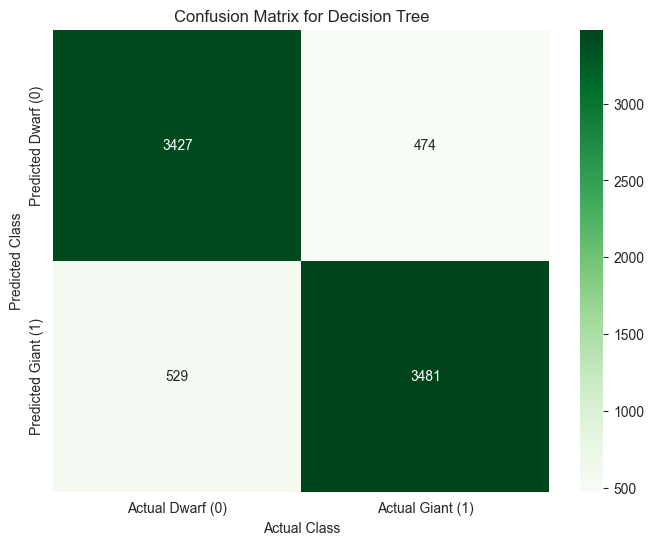


Plotting ROC and PR Curves for Decision Tree:


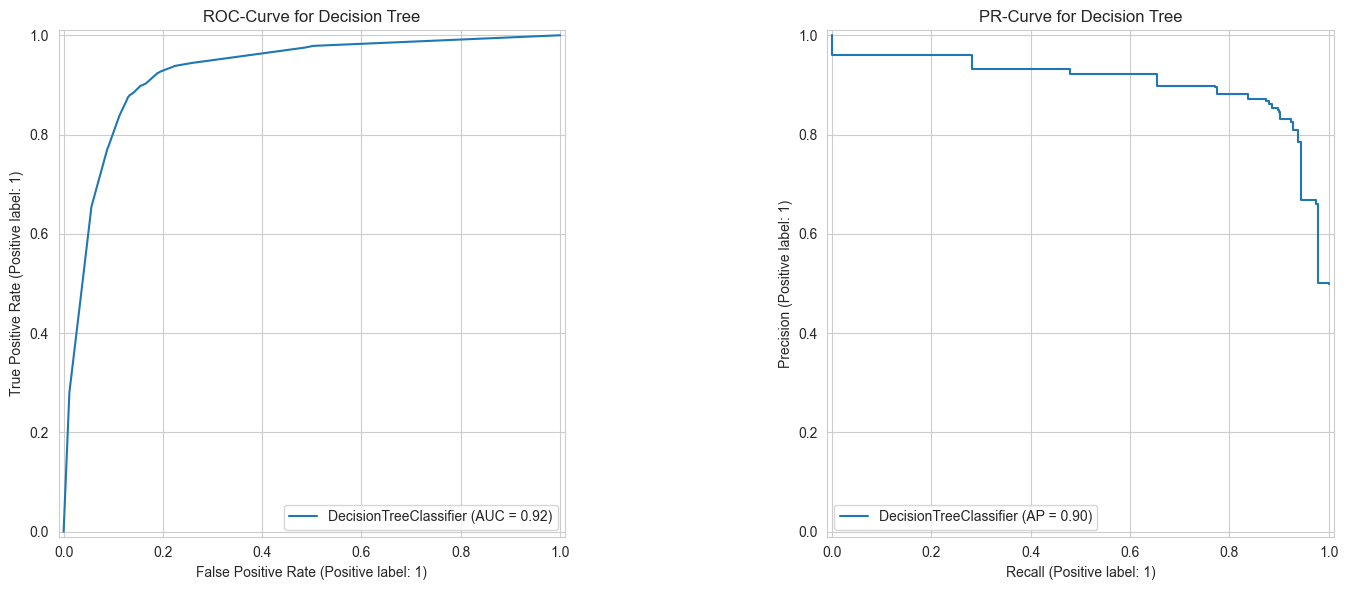


Calculating Permutation Importance for Decision Tree:
  Feature  Importance
2     B-V    0.287637
1     Plx    0.113778
0    Vmag    0.027734


C:\Users\kasht\AppData\Local\Temp\ipykernel_12048\3177434484.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=perm_importance_df, palette='cubehelix')


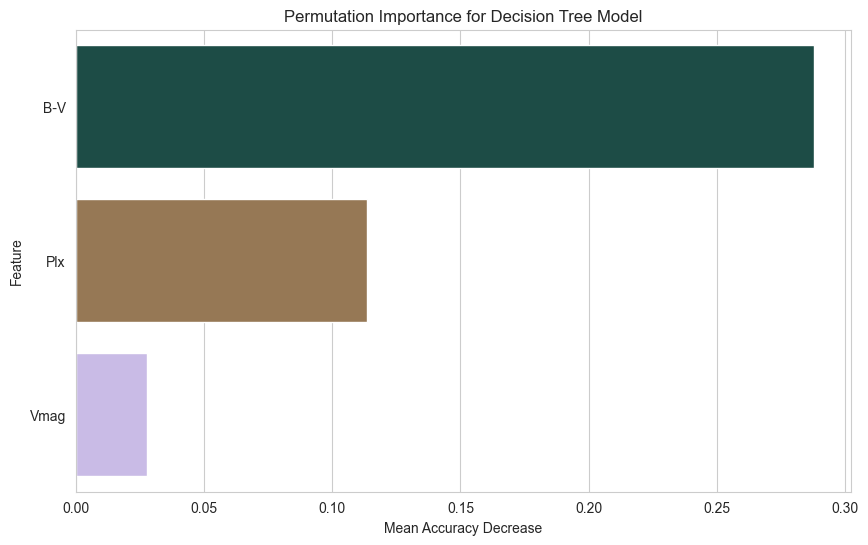


Generating the Decision Tree plot...


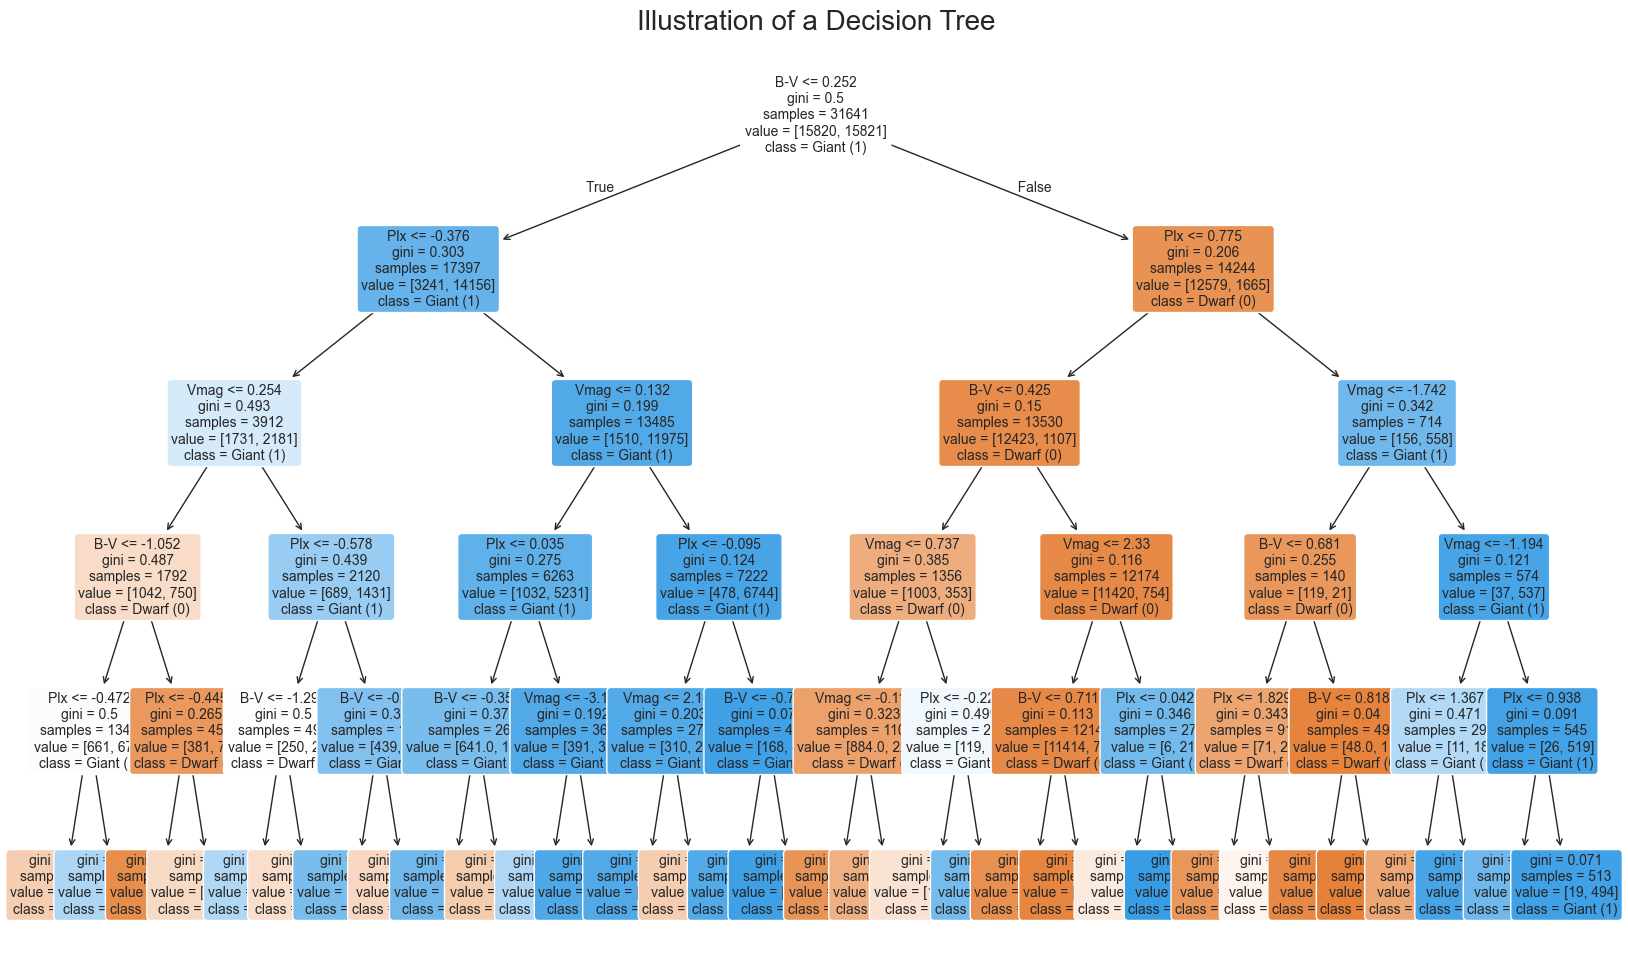

In [28]:
from sklearn.tree import plot_tree

model_results['Decision Tree'] = evaluate_model(
    model=dt_best, 
    model_name='Decision Tree',
    X_train=X_train_scaled, y_train=y_train,
    X_test=X_test_scaled, y_test=y_test,
    cmap='Greens'
)

# Plot the Decision Tree
print("\nGenerating the Decision Tree plot...")
plt.figure(figsize=(20, 12))

plot_tree(
    decision_tree=dt_best,
    feature_names=X_train_scaled.columns.tolist(),
    class_names=['Dwarf (0)', 'Giant (1)'],
    filled=True,
    rounded=True,
    fontsize=10
)

plt.title("Illustration of a Decision Tree", fontsize=20)
plt.show()

### Random Forest Method (Bagging Ensemble Method using Decision Tree)

In [51]:
from sklearn.ensemble import RandomForestClassifier

# Define the model.
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid.
param_grid_rf = {
    'n_estimators': [16, 32, 64, 128, 256],         # Number of trees in the forest
    'max_depth': [8, 16, 32, 64, 128],              # Maximum depth of the trees
    'min_samples_leaf': [2, 4, 16, 32, 64],         # Minimum number of samples required at a leaf node
    'max_features': ['sqrt']                        # Number of features to consider when looking for the best split
}

# Set up GridSearchCV.
print("Searching for the best parameters for Random Forest...")
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search.
grid_search_rf.fit(X_train_scaled, y_train)

# Get the best parameters.
best_params_rf = grid_search_rf.best_params_
print(f"Optimal parameters found: {best_params_rf}")
print(f"Best cross-validation accuracy: {grid_search_rf.best_score_:.4f}")

Searching for the best parameters for Random Forest...
Optimal parameters found: {'max_depth': 32, 'max_features': 'sqrt', 'min_samples_leaf': 16, 'n_estimators': 64}
Best cross-validation accuracy: 0.8838



Analyzing the impact of 'n_estimators' and 'max_depth' hyperparameters...


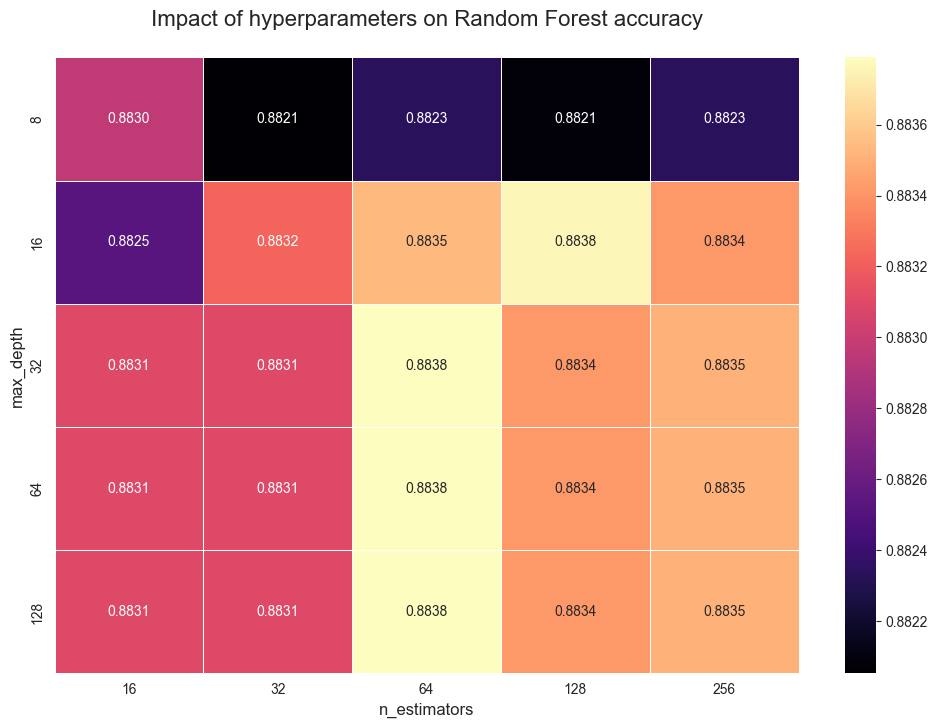

In [53]:
print("\nAnalyzing the impact of 'n_estimators' and 'max_depth' hyperparameters...")

# Extract results from GridSearchCV.
results = pd.DataFrame(grid_search_rf.cv_results_)

# We will create a heatmap for n_estimators vs. max_depth.
best_min_samples_leaf = best_params_rf['min_samples_leaf']
best_max_features = best_params_rf['max_features']

filtered_results = results[
    (results['param_min_samples_leaf'] == best_min_samples_leaf) &
    (results['param_max_features'] == best_max_features)
]

# Pivot the data to create a 2D grid for the heatmap.
pivot_table = filtered_results.pivot(
    index='param_max_depth', 
    columns='param_n_estimators', 
    values='mean_test_score'
)

# Create the heatmap.
plt.figure(figsize=(12, 8))
ax = sns.heatmap(
    pivot_table,
    annot=True,
    fmt=".4f",
    cmap="magma",
    linewidths=.5
)

# Add titles and labels.
ax.set_title(
    f'Impact of hyperparameters on Random Forest accuracy\n',
    fontsize=16
)
ax.set_xlabel('n_estimators', fontsize=12)
ax.set_ylabel('max_depth', fontsize=12)
plt.show()

In [30]:
# Create the final Random Forest model with the optimal parameters.
rf_best = RandomForestClassifier(**best_params_rf, random_state=42)

# Train the model.
rf_best.fit(X_train_scaled, y_train)
print("\nRandom Forest model trained with optimal parameters.")


Random Forest model trained with optimal parameters.


Evaluating model: Random Forest
Metrics from 'Test' dataset:
  Core Metrics:
    - Accuracy: 0.880546
    - AUC-ROC:  0.937741

  Precision:
    - Macro-Averaged: 0.881015
    - Micro-Averaged: 0.880546

  Recall:
    - Macro-Averaged: 0.880548
    - Micro-Averaged: 0.880546

  F1-score:
    - Macro-Averaged: 0.880510
    - Micro-Averaged: 0.880546

Metrics from 'Train' dataset:
  Core Metrics:
    - Accuracy: 0.893240
    - AUC-ROC:  0.964609

  Precision:
    - Macro-Averaged: 0.894043
    - Micro-Averaged: 0.893240

  Recall:
    - Macro-Averaged: 0.893239
    - Micro-Averaged: 0.893240

  F1-score:
    - Macro-Averaged: 0.893185
    - Micro-Averaged: 0.893240



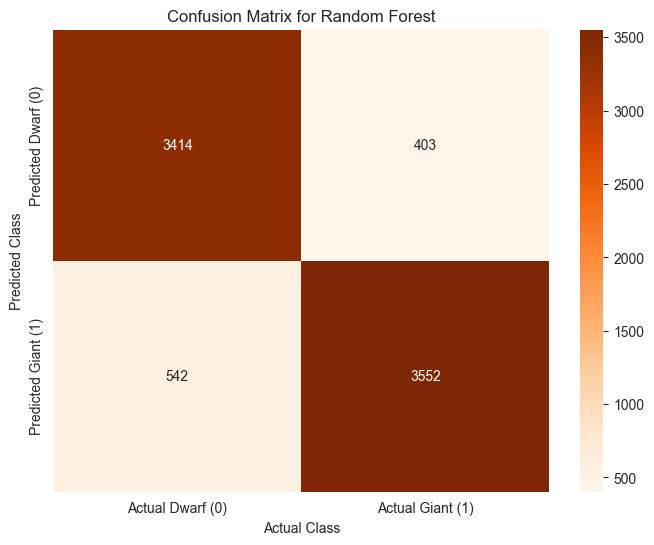


Plotting ROC and PR Curves for Random Forest:


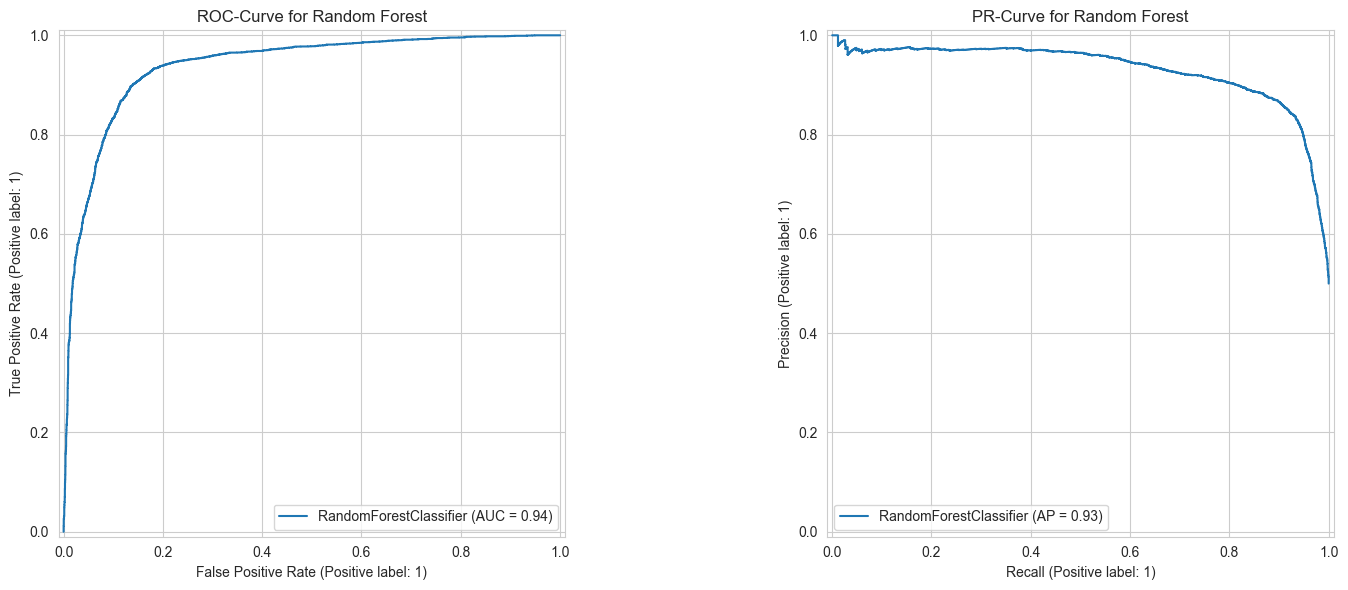


Calculating Permutation Importance for Random Forest:
  Feature  Importance
2     B-V    0.281216
1     Plx    0.111655
0    Vmag    0.044723


C:\Users\kasht\AppData\Local\Temp\ipykernel_12048\3177434484.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=perm_importance_df, palette='cubehelix')


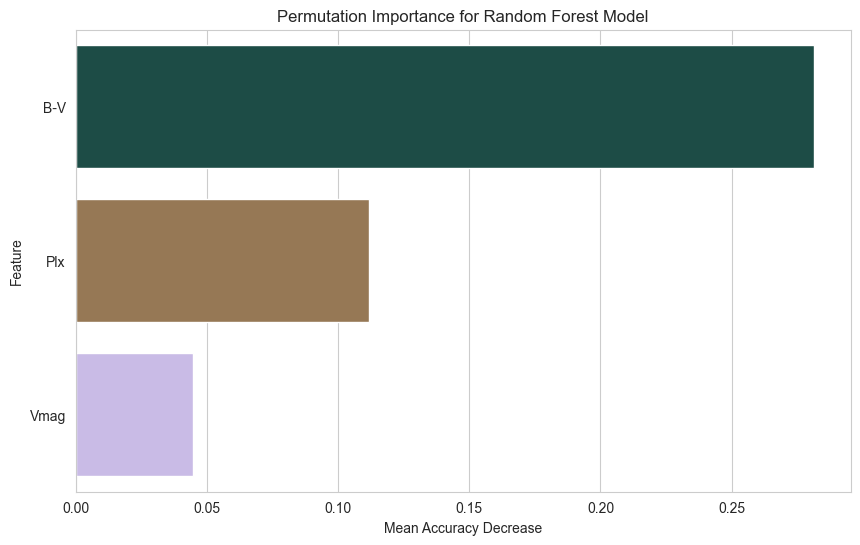

In [31]:
model_results['Random Forest'] = evaluate_model(
    model=rf_best, 
    model_name='Random Forest',
    X_train=X_train_scaled, y_train=y_train,
    X_test=X_test_scaled, y_test=y_test,
    cmap='Oranges'
)

### Support Vector Machine Method

In [43]:
from sklearn.svm import SVC

# Define the model.
svm = SVC(probability=True, random_state=42)

# Define a more focused parameter grid.
param_grid_svm = {
    'C': [0.1, 1, 10],                    # Regularization parameter
    'gamma': ['scale', 'auto', 0.1]       # Kernel coefficient
}

# Set up GridSearchCV.
print("Searching for the best parameters for SVM...")
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search. SVM requires scaled data.
grid_search_svm.fit(X_train_scaled, y_train)

# Get the best parameters.
best_params_svm = grid_search_svm.best_params_
print(f"Optimal parameters found: {best_params_svm}")
print(f"Best cross-validation accuracy: {grid_search_svm.best_score_:.4f}")

Searching for the best parameters for SVM...
Optimal parameters found: {'C': 10, 'gamma': 'scale'}
Best cross-validation accuracy: 0.8812



Analyzing the impact of 'C' and 'gamma' hyperparameters...


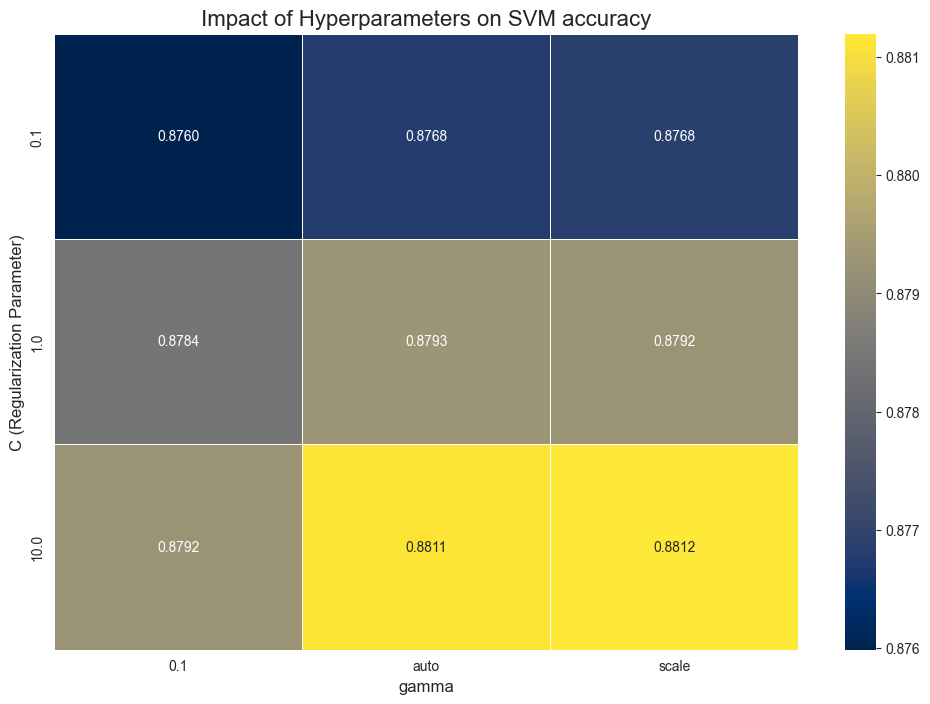

In [47]:
print("\nAnalyzing the impact of 'C' and 'gamma' hyperparameters...")

# Extract results from GridSearchCV.
results = pd.DataFrame(grid_search_svm.cv_results_)

# Pivot the data to create a 2D grid for the heatmap.
pivot_table = results.pivot(
    index='param_C', 
    columns='param_gamma', 
    values='mean_test_score'
)

# Create the heatmap.
plt.figure(figsize=(12, 8))
ax = sns.heatmap(
    pivot_table,
    annot=True,
    fmt=".4f",
    cmap="cividis",
    linewidths=.5
)

# Add titles and labels.
ax.set_title('Impact of Hyperparameters on SVM accuracy', fontsize=16)
ax.set_xlabel('gamma', fontsize=12)
ax.set_ylabel('C (Regularization Parameter)', fontsize=12)
plt.show()

In [33]:
# Create the final SVM model with the optimal parameters.
svm_best = SVC(**best_params_svm, probability=True, random_state=42)

# Train the model.
svm_best.fit(X_train_scaled, y_train)
print("\nSVM model trained with optimal parameters.")


SVM model trained with optimal parameters.


Evaluating model: SVM
Metrics from 'Test' dataset:
  Core Metrics:
    - Accuracy: 0.879788
    - AUC-ROC:  0.927098

  Precision:
    - Macro-Averaged: 0.881550
    - Micro-Averaged: 0.879788

  Recall:
    - Macro-Averaged: 0.879792
    - Micro-Averaged: 0.879788

  F1-score:
    - Macro-Averaged: 0.879650
    - Micro-Averaged: 0.879788

Metrics from 'Train' dataset:
  Core Metrics:
    - Accuracy: 0.881736
    - AUC-ROC:  0.931713

  Precision:
    - Macro-Averaged: 0.884173
    - Micro-Averaged: 0.881736

  Recall:
    - Macro-Averaged: 0.881734
    - Micro-Averaged: 0.881736

  F1-score:
    - Macro-Averaged: 0.881548
    - Micro-Averaged: 0.881736



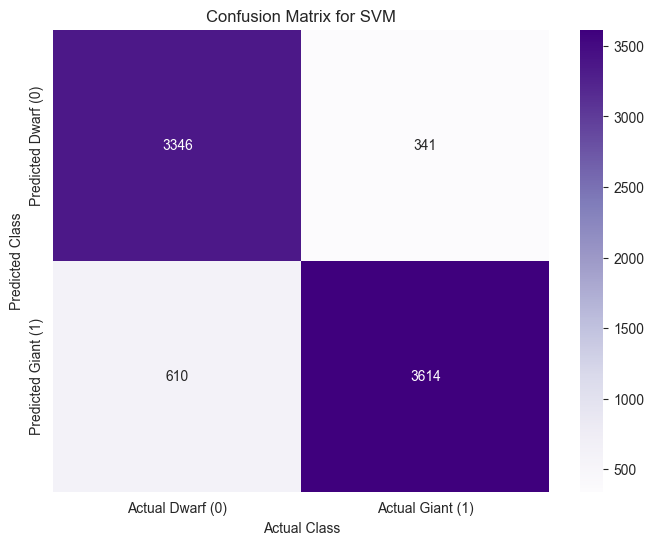


Plotting ROC and PR Curves for SVM:


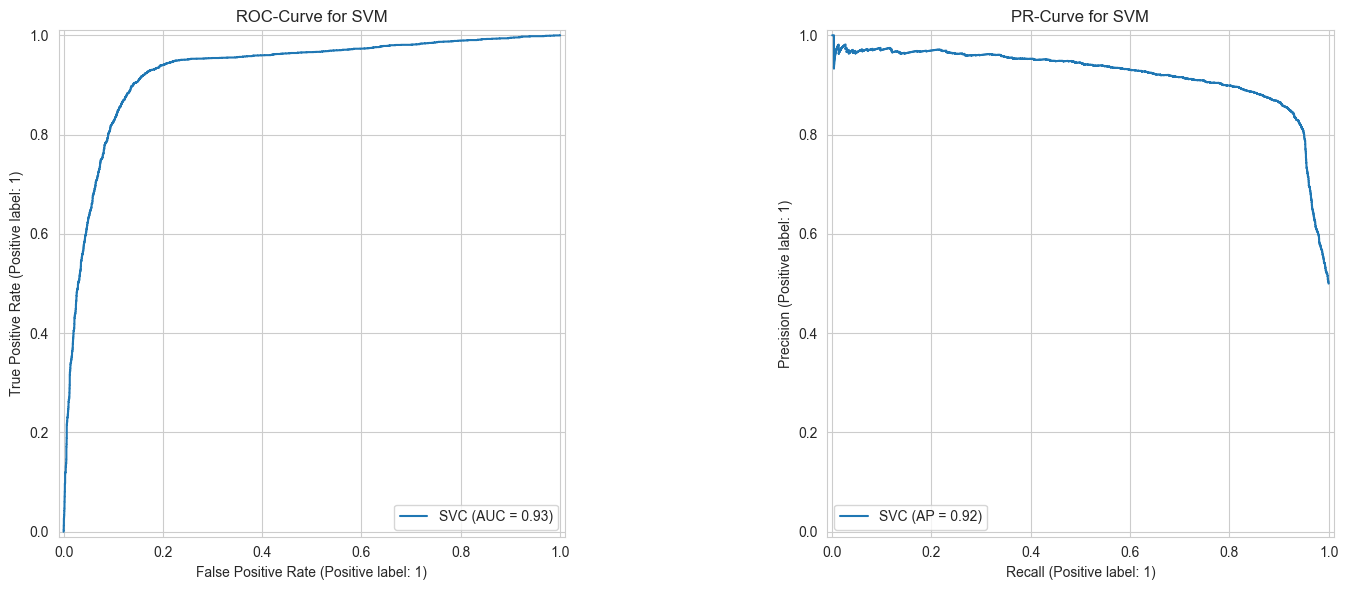


Calculating Permutation Importance for SVM:
  Feature  Importance
2     B-V    0.297649
1     Plx    0.095778
0    Vmag    0.048919


C:\Users\kasht\AppData\Local\Temp\ipykernel_12048\3177434484.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=perm_importance_df, palette='cubehelix')


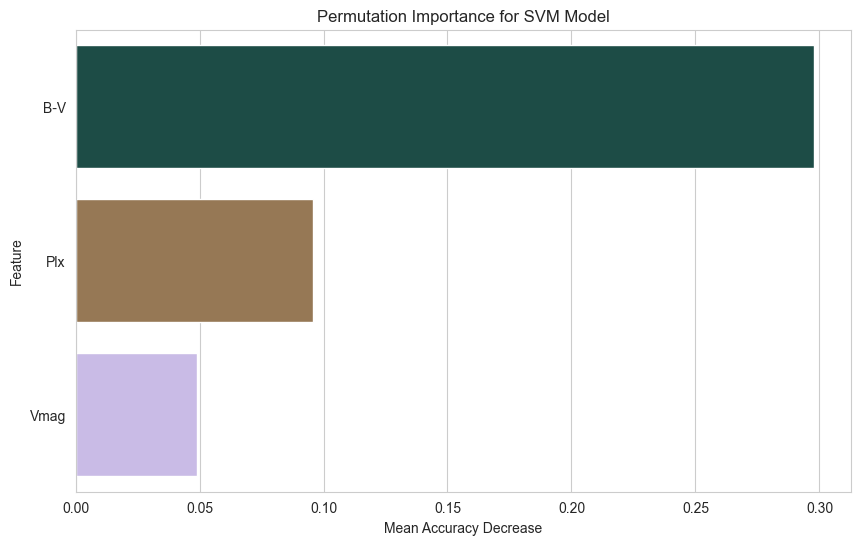

In [34]:
model_results['SVM'] = evaluate_model(
    model=svm_best, 
    model_name='SVM',
    X_train=X_train_scaled, y_train=y_train,
    X_test=X_test_scaled, y_test=y_test,
    cmap='Purples'
)

### Neural Network Method

In [43]:
# Create a wrapper class to make the Keras model compatible with scikit-learn's evaluation tools.
class KerasClassifierWrapper:
    def __init__(self, model):
        self.model = model
        self.classes_ = np.array([0, 1])
        self._estimator_type = "classifier"

    def fit(self, X, y):
        return self

    def predict(self, X):
        probabilities = self.model.predict(X, verbose=0)
        return (probabilities > 0.5).astype("int32").flatten()

    def predict_proba(self, X):
        proba_positive = self.model.predict(X, verbose=0).flatten()
        proba_negative = 1 - proba_positive
        return np.vstack((proba_negative, proba_positive)).T
    
    def score(self, X, y):
        y_pred = self.predict(X)
        return accuracy_score(y, y_pred)

In [55]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam
import datetime
import numpy as np

# Set up the TensorBoard callback
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

print(f"TensorBoard log directory: {log_dir}")

TensorBoard log directory: logs/fit/20251106-203658


In [38]:
# Define the neural network architecture using the Keras Sequential API
nn_model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),     # Input layer: Matches the number of features.
    Dense(16, activation='relu'),                # Hidden layers: Two layers with 16 and 8 neurons respectively, using 'relu' activation.
    Dense(8, activation='relu'),            
    Dense(1, activation='sigmoid')               # Output layer: A single neuron with 'sigmoid' activation for binary classification.
])

# Compile the model
nn_model.compile(
    optimizer='adam',                            # Optimizer: 'adam' is an efficient and widely used optimization algorithm.
    loss='binary_crossentropy',                  # Loss function: 'binary_crossentropy' is standard for two-class problems.
    metrics=['accuracy']                         # Metrics: We will monitor 'accuracy' during training.
)

# Display the model's architecture
nn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 209 (836.00 B)

 Trainable params: 209 (836.00 B)

 Non-trainable params: 0 (0.00 B)

In [39]:
# Train the model
history = nn_model.fit(
    X_train_scaled, 
    y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test_scaled, y_test),
    callbacks=[tensorboard_callback],
    verbose=1
)

print("\nNeural Network model trained successfully.")

Epoch 1/50
989/989 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8596 - loss: 0.3717 - val_accuracy: 0.8774 - val_loss: 0.3284
Epoch 2/50
989/989 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8790 - loss: 0.3178 - val_accuracy: 0.8792 - val_loss: 0.3222
Epoch 3/50
989/989 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8797 - loss: 0.3125 - val_accuracy: 0.8804 - val_loss: 0.3179
Epoch 4/50
989/989 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8800 - loss: 0.3096 - val_accuracy: 0.8804 - val_loss: 0.3154
Epoch 5/50
989/989 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8814 - loss: 0.3085 - val_accuracy: 0.8812 - val_loss: 0.3143
Epoch 6/50
989/989 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8821 - loss: 0.3072 - val_accuracy: 0.8819 - val_loss: 0.3133
Epoch 7/50
989/989 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8812 - loss: 0.3066 - val_accuracy: 0.8822 - val_loss: 0.3122
Epoch 8/50
989/989 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8816 - loss: 0.3062 - val_accuracy: 0.

Evaluating model: Neural Network
Metrics from 'Test' dataset:
  Core Metrics:
    - Accuracy: 0.880293
    - AUC-ROC:  0.940964

  Precision:
    - Macro-Averaged: 0.880402
    - Micro-Averaged: 0.880293

  Recall:
    - Macro-Averaged: 0.880294
    - Micro-Averaged: 0.880293

  F1-score:
    - Macro-Averaged: 0.880285
    - Micro-Averaged: 0.880293

Metrics from 'Train' dataset:
  Core Metrics:
    - Accuracy: 0.883063
    - AUC-ROC:  0.943742

  Precision:
    - Macro-Averaged: 0.883449
    - Micro-Averaged: 0.883063

  Recall:
    - Macro-Averaged: 0.883063
    - Micro-Averaged: 0.883063

  F1-score:
    - Macro-Averaged: 0.883034
    - Micro-Averaged: 0.883063



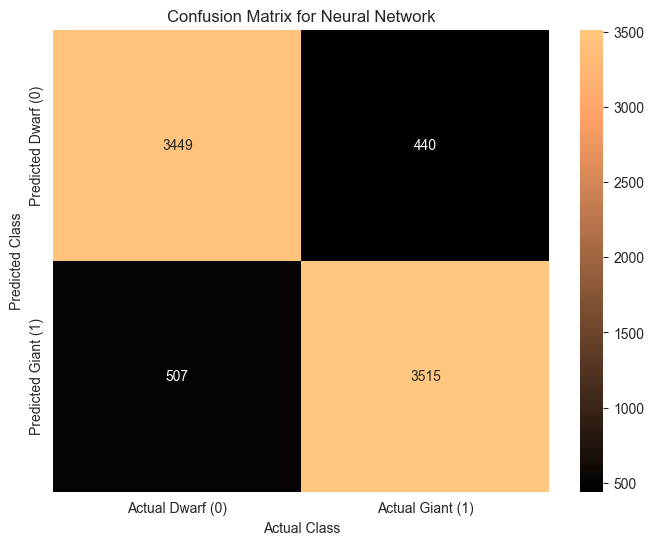


Plotting ROC and PR Curves for Neural Network:


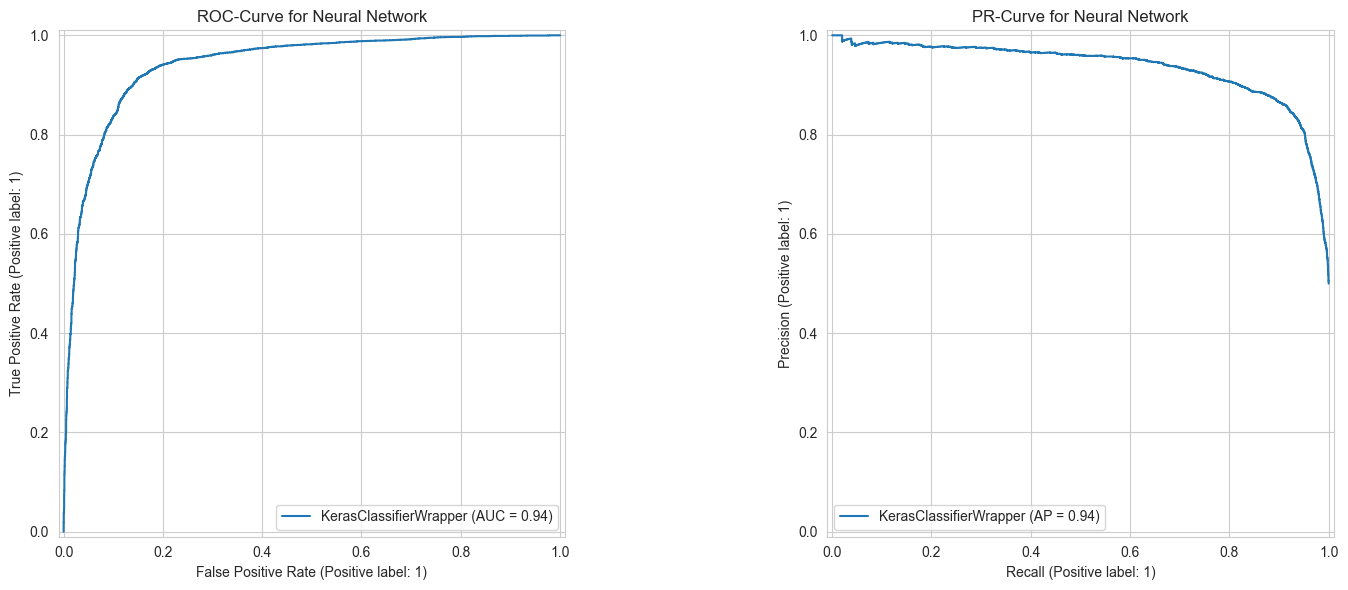


Calculating Permutation Importance for Neural Network:
  Feature  Importance
2     B-V    0.264897
1     Plx    0.131425
0    Vmag    0.070750


C:\Users\kasht\AppData\Local\Temp\ipykernel_12048\3177434484.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=perm_importance_df, palette='cubehelix')


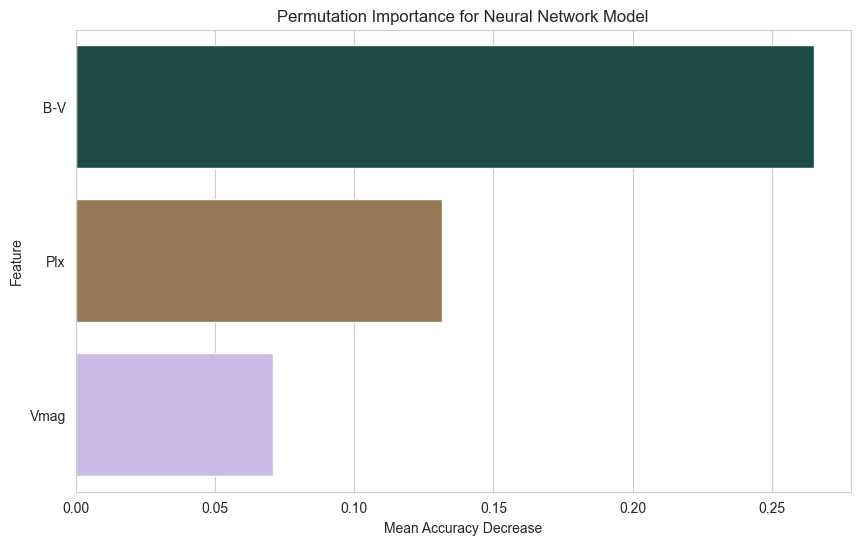

In [44]:
# Wrap the trained Keras model.
nn_best_wrapped = KerasClassifierWrapper(nn_model)

# Evaluate the model using the existing function and store the results.
model_results['Neural Network'] = evaluate_model(
    model=nn_best_wrapped, 
    model_name='Neural Network',
    X_train=X_train_scaled, y_train=y_train,
    X_test=X_test_scaled, y_test=y_test,
    cmap='copper'
)

In [54]:
def build_and_train_nn(X_train, y_train, X_val, y_val, params):
    # Set a seed for reproducibility of weights initialization
    tf.random.set_seed(42)
    
    # Build the model architecture
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    for neurons in params['layers']:
        model.add(Dense(neurons, activation=params['activation']))
    model.add(Dense(1, activation='sigmoid'))

    # Configure the optimizer with the specified learning rate
    optimizer = Adam(learning_rate=params['learning_rate'])

    # Compile the model
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    print(f"\nTraining model with params: {params}")
    history = model.fit(X_train, y_train,
                        epochs=params['epochs'],
                        batch_size=params['batch_size'],
                        validation_data=(X_val, y_val),
                        verbose=0)

    # Get the final validation accuracy
    final_val_accuracy = history.history['val_accuracy'][-1]
    print(f"Final validation accuracy: {final_val_accuracy:.4f}")
    
    return final_val_accuracy

In [ ]:
# Define a grid of hyperparameters to experiment with.
param_grid_nn = [
    # Baseline model
    {'layers': [16, 8], 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.001, 'epochs': 32, 'batch_size': 32},
    
    # Deeper network (more layers)
    {'layers': [32, 16, 8, 4], 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.001, 'epochs': 32, 'batch_size': 32},
    
    # Wider network (more neurons per layer)
    {'layers': [64, 32], 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.001, 'epochs': 32, 'batch_size': 32},
    
    # Effect of a lower learning rate
    {'layers': [16, 8], 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.0001, 'epochs': 32, 'batch_size': 32},

    # Effect of a higher learning rate
    {'layers': [16, 8], 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.01, 'epochs': 32, 'batch_size': 32},

    # Effect of a smaller batch size
    {'layers': [16, 8], 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.001, 'epochs': 32, 'batch_size': 16},
    
    # Effect of a larger batch size
    {'layers': [16, 8], 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.001, 'epochs': 32, 'batch_size': 128},
]

# Store results
results_list = []

# Iterate over the parameter grid, train models, and store results.
for params in param_grid_nn:
    val_accuracy = build_and_train_nn(X_train_scaled, y_train, X_test_scaled, y_test, params)
    
    result = params.copy()
    result['validation_accuracy'] = val_accuracy
    results_list.append(result)

# Convert the list of results into a pandas DataFrame for easier analysis.
results_nn_df = pd.DataFrame(results_list)

# Display the results sorted by accuracy
print("\nExperiment results:")
results_nn_df_sorted = results_nn_df.sort_values(by='validation_accuracy', ascending=False)
print(results_nn_df_sorted)


Training model with params: {'layers': [16, 8], 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.001, 'epochs': 32, 'batch_size': 32}
Final validation accuracy: 0.8813

Training model with params: {'layers': [32, 16, 8, 4], 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.001, 'epochs': 32, 'batch_size': 32}
Final validation accuracy: 0.8822

Training model with params: {'layers': [64, 32], 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.001, 'epochs': 32, 'batch_size': 32}
Final validation accuracy: 0.8794

Training model with params: {'layers': [16, 8], 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.0001, 'epochs': 32, 'batch_size': 32}
Final validation accuracy: 0.8802

Training model with params: {'layers': [16, 8], 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.01, 'epochs': 32, 'batch_size': 32}
Final validation accuracy: 0.8807

Training model with params: {'layers': [16, 8], 'activation': 'relu', 'optimizer'

C:\Users\kasht\AppData\Local\Temp\ipykernel_15616\2032405272.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='validation_accuracy', y='model_name', data=results_nn_df, palette='viridis')


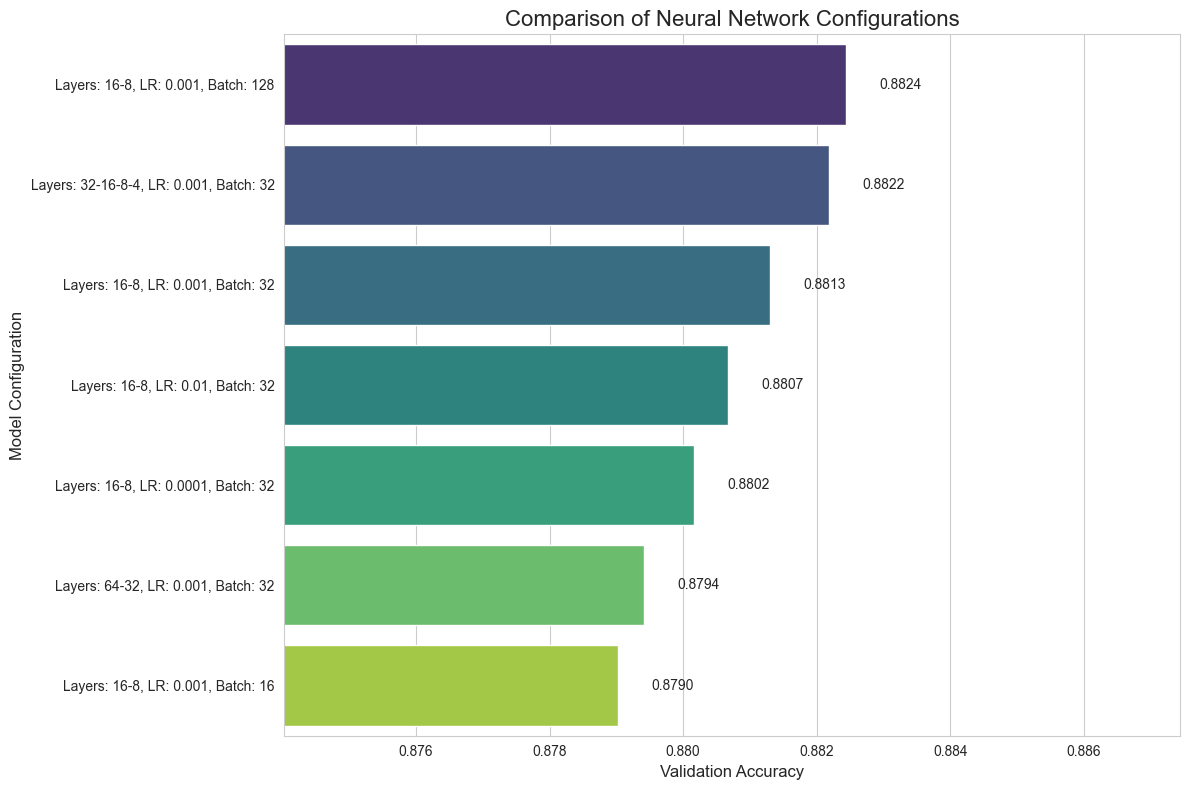

C:\Users\kasht\AppData\Local\Temp\ipykernel_15616\2032405272.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax1, x='arch_label', y='validation_accuracy', data=arch_df, palette='plasma')
C:\Users\kasht\AppData\Local\Temp\ipykernel_15616\2032405272.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax2, x='learning_rate', y='validation_accuracy', data=lr_df, palette='magma', order=lr_df['learning_rate'])
C:\Users\kasht\AppData\Local\Temp\ipykernel_15616\2032405272.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax3, x='ba

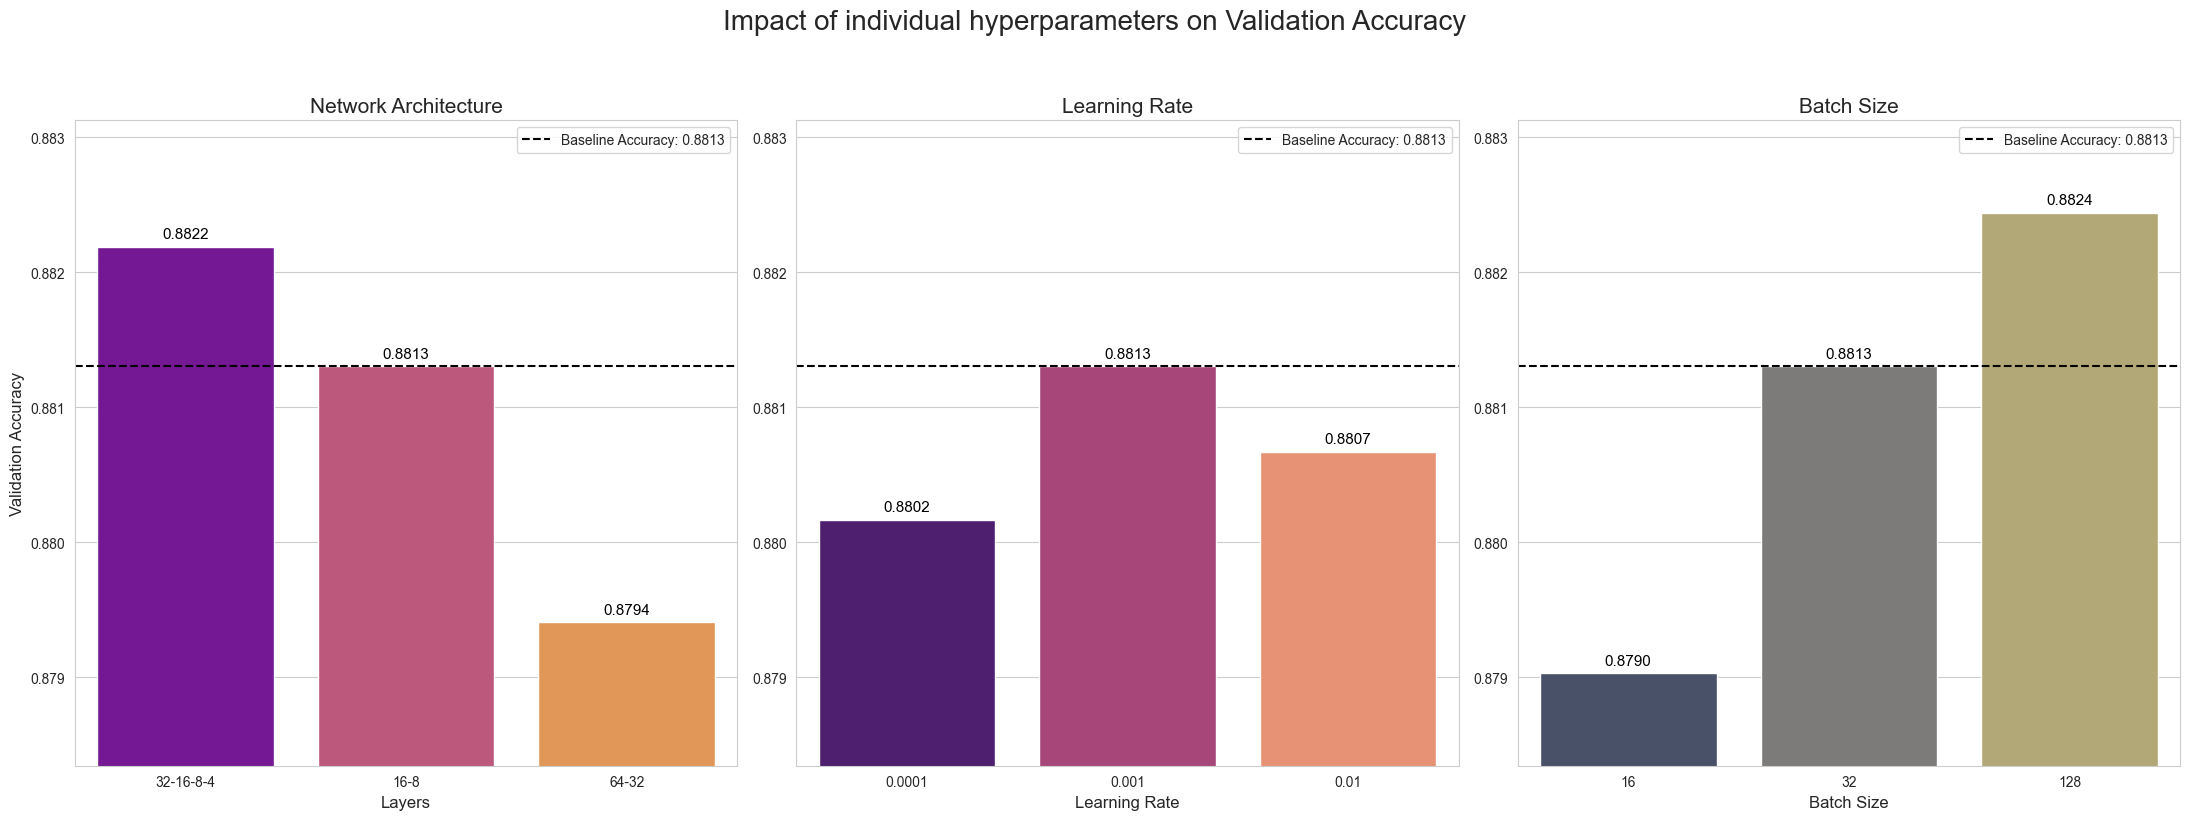

In [ ]:
def create_model_name(row):
    layers_str = '-'.join(map(str, row['layers']))
    return f"Layers: {layers_str}, LR: {row['learning_rate']}, Batch: {row['batch_size']}"

results_nn_df['model_name'] = results_nn_df.apply(create_model_name, axis=1)

# Sort values for a cleaner plot
results_nn_df = results_nn_df.sort_values('validation_accuracy', ascending=False)

# General Comparison Plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='validation_accuracy', y='model_name', data=results_nn_df, palette='viridis')
ax.set_title('Comparison of Neural Network Configurations', fontsize=16)
ax.set_xlabel('Validation Accuracy', fontsize=12)
ax.set_ylabel('Model Configuration', fontsize=12)

# Add accuracy labels to the bars
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.0005, p.get_y() + p.get_height() / 2.,
             f'{width:.4f}',
             va='center')

plt.xlim([min(results_nn_df['validation_accuracy']) - 0.005, max(results_nn_df['validation_accuracy']) + 0.005])
plt.tight_layout()
plt.show()

# Focused Analysis Plots
try:
    baseline_accuracy = results_nn_df[
        (results_nn_df['layers'].apply(lambda x: x == [16, 8])) &
        (results_nn_df['learning_rate'] == 0.001) &
        (results_nn_df['batch_size'] == 32)
    ]['validation_accuracy'].iloc[0]
except IndexError:
    baseline_accuracy = results_nn_df['validation_accuracy'].median() 

# Calculate dynamic y-axis limits to zoom in on the results
min_acc = results_nn_df['validation_accuracy'].min()
max_acc = results_nn_df['validation_accuracy'].max()
padding = (max_acc - min_acc) * 0.2
y_lim_bottom = min_acc - padding
y_lim_top = max_acc + padding

fig, axes = plt.subplots(1, 3, figsize=(22, 8))
fig.suptitle('Impact of individual hyperparameters on Validation Accuracy', fontsize=20, y=1.02)

# Impact of Architecture
ax1 = axes[0]
arch_df = results_nn_df[
    (results_nn_df['learning_rate'] == 0.001) & 
    (results_nn_df['batch_size'] == 32)
].copy()
arch_df['arch_label'] = arch_df['layers'].apply(lambda x: '-'.join(map(str, x)))
sns.barplot(ax=ax1, x='arch_label', y='validation_accuracy', data=arch_df, palette='plasma')
ax1.set_title('Network Architecture', fontsize=15)
ax1.set_xlabel('Layers', fontsize=12)
ax1.set_ylabel('Validation Accuracy', fontsize=12)

# Impact of Learning Rate
ax2 = axes[1]
lr_df = results_nn_df[
    (results_nn_df['layers'].apply(lambda x: x == [16, 8])) & 
    (results_nn_df['batch_size'] == 32)
].copy()
lr_df = lr_df.sort_values('learning_rate')
sns.barplot(ax=ax2, x='learning_rate', y='validation_accuracy', data=lr_df, palette='magma', order=lr_df['learning_rate'])
ax2.set_title('Learning Rate', fontsize=15)
ax2.set_xlabel('Learning Rate', fontsize=12)
ax2.set_ylabel('')

# Impact of Batch Size
ax3 = axes[2]
batch_df = results_nn_df[
    (results_nn_df['layers'].apply(lambda x: x == [16, 8])) & 
    (results_nn_df['learning_rate'] == 0.001)
].copy()
batch_df = batch_df.sort_values('batch_size')
sns.barplot(ax=ax3, x='batch_size', y='validation_accuracy', data=batch_df, palette='cividis', order=batch_df['batch_size'])
ax3.set_title('Batch Size', fontsize=15)
ax3.set_xlabel('Batch Size', fontsize=12)
ax3.set_ylabel('')

# Apply improvements to all subplots
for ax in axes:
    # Set the y-axis limits to zoom in on the relevant range
    ax.set_ylim(y_lim_bottom, y_lim_top)
    
    # Add a horizontal line for the baseline model for easy comparison
    ax.axhline(baseline_accuracy, ls='--', color='black', lw=1.5, label=f'Baseline Accuracy: {baseline_accuracy:.4f}')
    
    # Add value labels to the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.4f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom',
                    xytext=(0, 4), 
                    textcoords='offset points',
                    fontsize=11,
                    color='black')
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

### Comparing all results

Final comparison of all models:
                Accuracy   AUC-ROC  F1-Macro  Precision-Macro  Recall-Macro
Random Forest   0.880546  0.937741  0.880510         0.881015      0.880548
Neural Network  0.880293  0.940964  0.880285         0.880402      0.880294
SVM             0.879788  0.927098  0.879650         0.881550      0.879792
kNN             0.879535  0.933800  0.879490         0.880102      0.879537
LDA             0.873467  0.894172  0.873222         0.876395      0.873473
Decision Tree   0.873215  0.924705  0.873209         0.873286      0.873215
Naive Bayes     0.849324  0.892469  0.849323         0.849327      0.849324


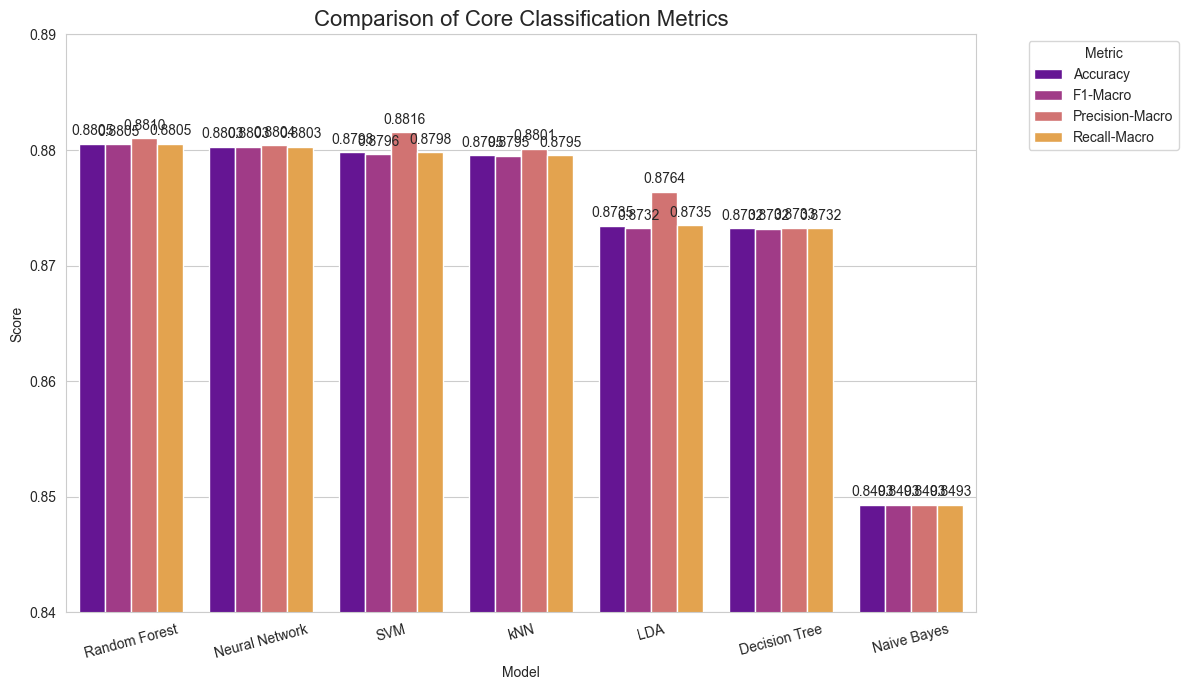

C:\Users\kasht\AppData\Local\Temp\ipykernel_12048\1695008530.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x='Model', y='Score', data=auc_to_plot, palette=['#34568B'])
C:\Users\kasht\AppData\Local\Temp\ipykernel_12048\1695008530.py:39: UserWarning: 
The palette list has fewer values (1) than needed (7) and will cycle, which may produce an uninterpretable plot.
  ax2 = sns.barplot(x='Model', y='Score', data=auc_to_plot, palette=['#34568B'])


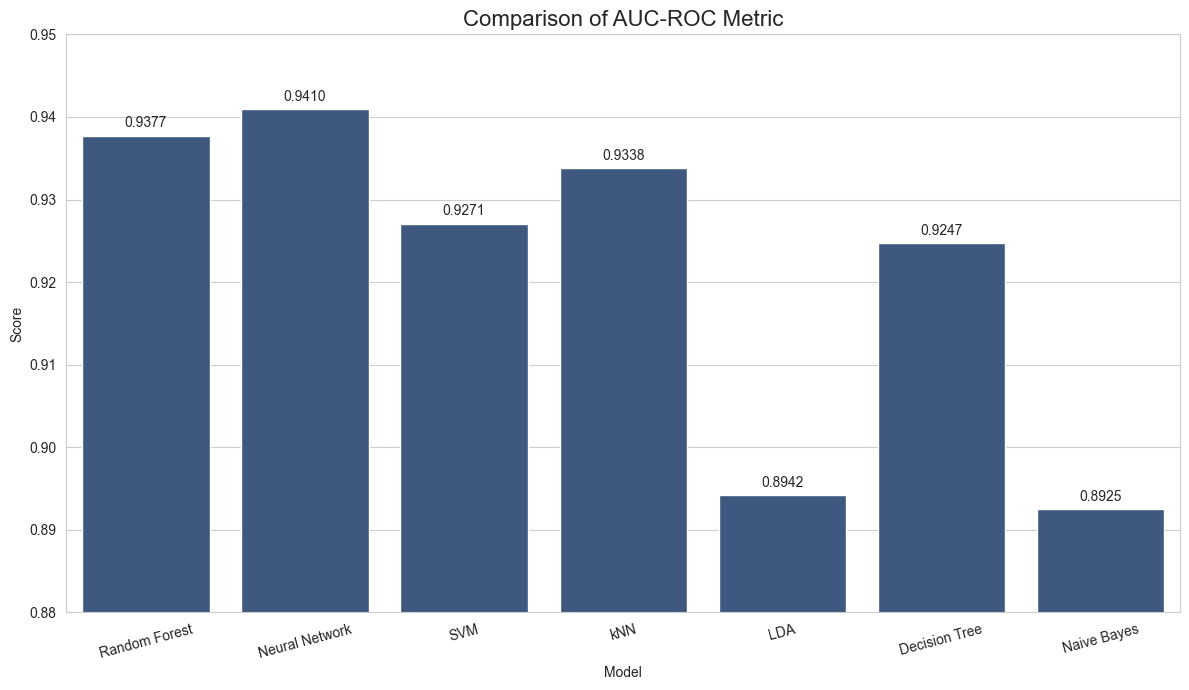

In [47]:
# Create a pandas DataFrame from the results dictionary.
results_df = pd.DataFrame(model_results).T

results_df_sorted = results_df.sort_values(by='Accuracy', ascending=False)

print("Final comparison of all models:")
print(results_df_sorted)

# Reset index to use model names in the plot.
results_to_plot = results_df_sorted.reset_index().rename(columns={'index': 'Model'})

# Melt the DataFrame to a long format suitable for seaborn's barplot.
results_melted = pd.melt(results_to_plot, id_vars='Model', var_name='Metric', value_name='Score')

# Core Classification Metrics.
plt.figure(figsize=(12, 7))
metrics_to_plot = results_melted[results_melted['Metric'] != 'AUC-ROC']
ax1 = sns.barplot(x='Model', y='Score', hue='Metric', data=metrics_to_plot, palette='plasma')

# Add score labels.
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.4f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.title('Comparison of Core Classification Metrics', fontsize=16)
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=15)
plt.ylim(0.84, 0.89) 
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# AUC-ROC Metric Only.
plt.figure(figsize=(12, 7))
auc_to_plot = results_melted[results_melted['Metric'] == 'AUC-ROC']
ax2 = sns.barplot(x='Model', y='Score', data=auc_to_plot, palette=['#34568B'])

# Add score labels.
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.4f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.title('Comparison of AUC-ROC Metric', fontsize=16)
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=15)
plt.ylim(0.88, 0.95)
plt.tight_layout()
plt.show()

### Analyzing the impact of feature removal

In [65]:
print("Analyzing impact of removing features one by one:")

original_accuracy = model_results['Random Forest']['Accuracy']
print(f"Original Model Accuracy: {original_accuracy:.6f}\n")

features_to_test = ['Vmag', 'Plx', 'B-V']

removal_results = {}

for feature_to_remove in features_to_test:
    print(f"- Testing model after removing feature: '{feature_to_remove}'")
    
    # Create new DataFrames without the specified feature.
    X_train_reduced = X_train_scaled.drop(columns=[feature_to_remove])
    X_test_reduced = X_test_scaled.drop(columns=[feature_to_remove])
    
    # Create and train a new Random Forest model on the reduced data.
    rf_reduced = RandomForestClassifier(**best_params_rf, random_state=42)
    rf_reduced.fit(X_train_reduced, y_train)
    
    # Evaluate the new model.
    y_pred_reduced = rf_reduced.predict(X_test_reduced)
    accuracy_new = accuracy_score(y_test, y_pred_reduced)
    
    # Calculate and print the performance drop.
    accuracy_drop = original_accuracy - accuracy_new
    
    print(f"  New Accuracy: {accuracy_new:.6f}")
    print(f"  Accuracy Drop: {accuracy_drop:.6f} ({accuracy_drop/original_accuracy:.3%})\n")
    
    # Store the result
    removal_results[f"{feature_to_remove}"] = {
        'New Accuracy': accuracy_new,
        'Accuracy Drop': accuracy_drop
    }

# Display a summary of the results
print("Summary of feature removal impact:")
summary_df = pd.DataFrame(removal_results).T.sort_values(by='Accuracy Drop')
print(summary_df)

Analyzing impact of removing features one by one:
Original Model Accuracy: 0.880546

- Testing model after removing feature: 'Vmag'
  New Accuracy: 0.864366
  Accuracy Drop: 0.016180 (1.837%)

- Testing model after removing feature: 'Plx'
  New Accuracy: 0.849071
  Accuracy Drop: 0.031475 (3.575%)

- Testing model after removing feature: 'B-V'
  New Accuracy: 0.747061
  Accuracy Drop: 0.133485 (15.159%)

Summary of feature removal impact:
      New Accuracy  Accuracy Drop
Vmag      0.864366       0.016180
Plx       0.849071       0.031475
B-V       0.747061       0.133485


In [66]:
print("Analyzing impact of removing two features:")

original_accuracy = model_results['Random Forest']['Accuracy']
print(f"Original Model Accuraccy: {original_accuracy:.6f}\n")

features_to_test = ['Vmag', 'Plx', 'B-V']

single_feature_results = {}

for feature_to_keep in features_to_test:
    print(f"- Testing model using feature: '{feature_to_keep}'")
    
    # Create new DataFrames with only the specified feature.
    X_train_single = X_train_scaled[[feature_to_keep]]
    X_test_single = X_test_scaled[[feature_to_keep]]
    
    # Create and train a new Random Forest model.
    rf_single = RandomForestClassifier(**best_params_rf, random_state=42)
    rf_single.fit(X_train_single, y_train)
    
    # Evaluate the new model.
    y_pred_single = rf_single.predict(X_test_single)
    accuracy_new = accuracy_score(y_test, y_pred_single)
    
    # Calculate and print the performance drop.
    accuracy_drop = original_accuracy - accuracy_new
    
    print(f"  New Accuracy: {accuracy_new:.6f}")
    print(f"  Accuracy Drop: {accuracy_drop:.6f} ({accuracy_drop/original_accuracy:.3%})\n")
    
    # Store the result
    single_feature_results[f"{feature_to_keep}"] = {
        'New Accuracy': accuracy_new,
        'Accuracy Drop': accuracy_drop
    }

# Display a summary of the results
print("Summary of single-feature model performance:")
summary_single_df = pd.DataFrame(single_feature_results).T.sort_values(by='New Accuracy', ascending=False)
print(summary_single_df)

Analyzing impact of removing two features:
Original Model Accuraccy: 0.880546

- Testing model using feature: 'Vmag'
  New Accuracy: 0.561749
  Accuracy Drop: 0.318797 (36.204%)

- Testing model using feature: 'Plx'
  New Accuracy: 0.690684
  Accuracy Drop: 0.189862 (21.562%)

- Testing model using feature: 'B-V'
  New Accuracy: 0.842245
  Accuracy Drop: 0.038301 (4.350%)

Summary of single-feature model performance:
      New Accuracy  Accuracy Drop
B-V       0.842245       0.038301
Plx       0.690684       0.189862
Vmag      0.561749       0.318797
